## Transition test

In [1]:
import numpy as np, scipy.stats as ss,matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib as mpl
import matplotlib.font_manager as fm

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.stats as ss
from matplotlib.animation import FuncAnimation
import pandas as pd
from IPython.display import HTML
from matplotlib import rcParams
from functools import partial
import time as TT
import networkx as nx
import seaborn as sns
rcParams['animation.embed_limit'] = 2**128

In [ ]:
from KURAMOTO_SIM.Integrator import HEUN2, RK4

In [ ]:
rcParams['font.family'] = './FONT/Giveny.ttf'

In [3]:
mu = 0
g = lambda x : ss.norm.pdf(x,loc = mu, scale =1.8)
# omega_gen = lambda N : ss.cauchy.rvs(loc = 0, scale =2, size = N)
omega_gen = lambda N : ss.norm.rvs(loc = mu, scale =1.8, size = N)
theta_gen = lambda N : np.linspace(-np.pi,np.pi,N,endpoint=False)
Kc = 2/(np.pi*g(mu))

In [4]:
x = np.arange(0,3,1e-2)

In [5]:
g_ = g(x)
dg = np.diff(g_)
ddg = np.diff(dg)

In [6]:
def K_R_theorical(K):
    Kc = 2/(np.pi*g(0))
    
    if K>Kc:
        ddg_m = np.sqrt(1/np.pi)
        first = np.sqrt(16/(np.pi*Kc**4))
        second = np.sqrt((K-Kc)/ddg_m)
        return first*second
    else: return 0

In [7]:
KC = 2/(np.pi*g(0))

In [ ]:
K = np.arange(0,3,1e-3)

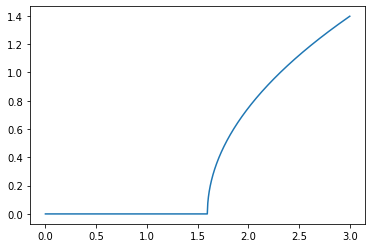

In [ ]:
plt.plot(K,list(map(K_R_theorical,K)))

In [ ]:
# mu = 0
# g = lambda x : ss.uniform.pdf(x,loc=-4,scale=8)
# # omega_gen = lambda N : ss.cauchy.rvs(loc = 0, scale = 0.5, size = N)
# omega_gen = lambda N : ss.uniform.rvs(loc=-4,scale=8, size = N)
# theta_gen = lambda N : np.linspace(-np.pi,np.pi,N,endpoint=False)
# Kc = 2/(np.pi*g(mu))

In [ ]:
# omega = np.random.choice([i for i in omega_gen(100000) if (i<5)&(i>-5)],size=10000)

In [ ]:
6.5 9.15

In [21]:
mu = 1
g = lambda x : ss.norm.pdf(x,loc = mu, scale =1.0)
# omega_gen = lambda N : ss.cauchy.rvs(loc = 0, scale =2, size = N)
omega_gen = lambda N : ss.norm.rvs(loc = mu, scale =1.0, size = N)
theta_gen = lambda N : np.linspace(-np.pi,np.pi,N,endpoint=False)
Kc = 2/(np.pi*g(mu))

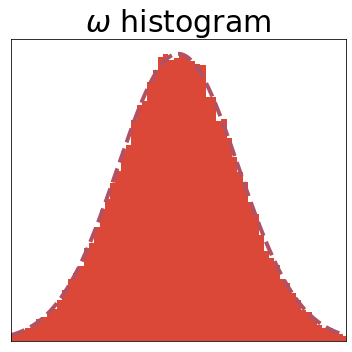

In [4]:
plt.figure(figsize=(5,5))
x = np.arange(-5,5,0.01)
plt.hist(omega_gen(100000),bins=100,density=True,color='#DC4838')
plt.title(r'$\omega$ histogram',fontsize=30)
# plt.ylabel('Density',fontsize=15)
plt.plot(x,g(x),lw=4,ls='--',color='#B05264')
# plt.title(r'Normal distribution $N(0,1)$',fontsize=40)
plt.tight_layout()
plt.xlim(-5,5)
# plt.ylim(0,0.45)
now = plt.gca()
# now.axis('off')
# ax.axis('off')
now.axes.get_yaxis().set_visible(False)
now.axes.get_xaxis().set_visible(False)
plt.tight_layout()

# plt.savefig('./DATA_FILE/uniform_distribution.png',dpi=400, transparent = True)
plt.savefig('./DATA_FILE/unimodal.jpg',dpi=800, transparent = True)
# plt.savefig('./DATA_FILE/uniform_distribution.png',dpi=400, transparent = True)
# plt.savefig(d)

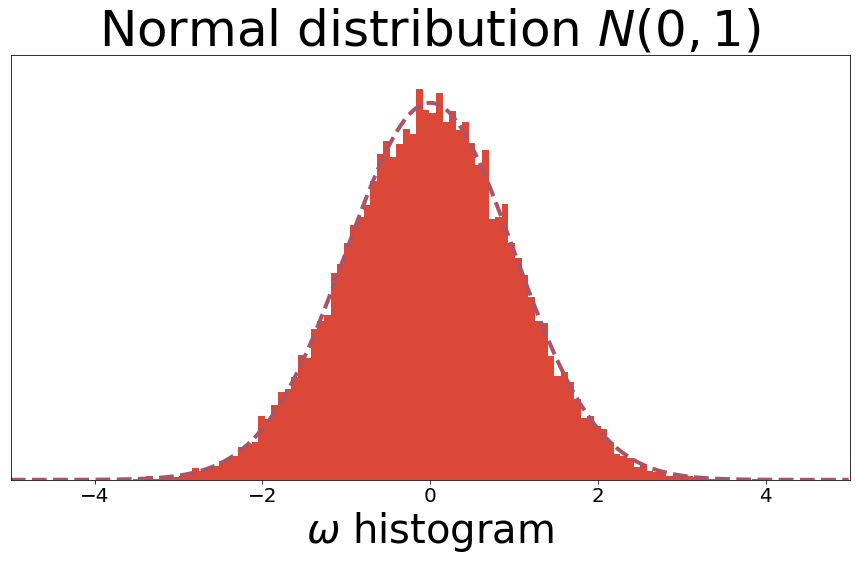

In [6]:
plt.figure(figsize=(12,7.9))
x = np.arange(-5,5,0.01)
plt.hist(omega_gen(20000),bins=100,density=True,color='#DC4838')
plt.xlabel(r'$\omega$ histogram',fontsize=40)
plt.ylabel('Density',fontsize=15)
plt.plot(x,g(x),lw=4,ls='--',color='#B05264')
plt.title(r'Normal distribution $N(0,1)$',fontsize=50)
plt.tight_layout()
plt.xticks(fontsize = 20)
plt.xlim(-5,5)
plt.ylim(0,0.45)
now = plt.gca()
now.axes.get_yaxis().set_visible(False)
plt.tight_layout()
# plt.savefig('./DATA_FILE/uniform_distribution.png',dpi=400, transparent = True)
plt.savefig('./DATA_FILE/Normal distribution.jpg',dpi=800, transparent = True)
# plt.savefig('./DATA_FILE/uniform_distribution.png',dpi=400, transparent = True)
# plt.savefig(d)

Seed는 random generator를 한번 만나면 임의의 값으로 초기화가 된다.

In [ ]:
np.random.uniform(-np.pi,np.pi,5)

array([ 1.09303508, -0.66722207,  0.55183868,  0.67134414, -2.44136003])

In [22]:
N = 10
# theta = theta_gen(N)
# theta = np.random.uniform(-np.pi,np.pi,N)
theta = np.linspace(-np.pi,np.pi,N,endpoint=False)
omega = omega_gen(N) 
# omega -= np.mean(omega)
aij = np.ones((N,N)) - np.eye(N)
mi = aij.sum(axis=1)
K = 1.8
# theta =(0.5*np.pi,-0.5*np.pi)

In [ ]:
N = 2
# theta = theta_gen(N)
theta = np.random.uniform(-np.pi,np.pi,N)
omega = [0.3,0.5]
# omega -= np.mean(omega)
aij = np.ones((N,N)) - np.eye(N)
mi = aij.sum(axis=1)
K = 1
# theta =(0.5*np.pi,-0.5*np.pi)

## theta를 찍어보기, 정ㅁ라 잘 동기화가 된지


In [7]:
def KURAMOTO(t,theta,K,omega,aij,mi,b):
    i,j=np.meshgrid(theta,theta,sparse=True)
    interaction=aij*np.sin(j-i)
    dxdt=-b*np.sin(i)+omega+K*(interaction/mi).sum(axis=0)
    return dxdt

In [8]:
end = 200
t = np.arange(0,end+0.01,0.01)
b = 0
sol1 = solve_ivp(KURAMOTO,[0,end],theta,args=(3,omega,aij,mi,b),t_eval=t,atol=1e-10,rtol=1e-10)

t = sol1.t
z = sol1.y
r = np.abs(np.sum(np.exp(1j*z),axis=0)/N)

plt.plot(t,r)


NameError: name 'theta' is not defined

In [11]:
t = sol1.t
z = sol1.y
r = np.abs(np.sum(np.exp(1j*z),axis=0)/N)


In [2]:
x = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(x),'y':np.sin(x)
}

NameError: name 'np' is not defined

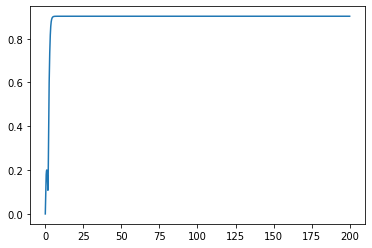

In [34]:
plt.plot(t,r)

In [12]:
np.min(r)
index = np.argmin(r[100:])
r[index]

0.08165247256118827

0.7567625451165941

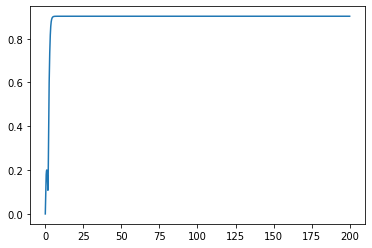

In [55]:
plt.plot(t,r)
r[300]

In [1]:
from itertools import combinations,permutations

i = 300
index = i
# fig = plt.figure(figsize=(5,5))
colors = ['#9D281B','#DC4838']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=200,facecolor=(1,1,1,0))
data = {
    'x': np.sin(z[:,i]),'y':np.cos(z[:,i]),
    'c': omega,'cmap':'YlOrRd',
    # 'c': colors,#omega,'cmap':'YlOrRd',
    's':800
}
X = np.sin(z[:,i])
Y = np.cos(z[:,i])
line = {
    'x':list(permutations(X,2)),
    'y':list(permutations(Y,2))
}  
# plt.plot(tempx,tempy)
lw = 5
# colors = ['#9D281B','#DC4838']
for i in range(len(line['x'])):
    ax.plot(line['x'][i],line['y'][i],color='#EA9086',zorder=0,lw=lw,alpha=0.8)
# ax.plot([0,np.mean(X)],[0,np.mean(Y)],color='#9D281B',lw=3,marker='o')
i = index

ax.plot(np.cos(x),np.sin(x),zorder=0,color='#AC6861',lw=6)
cax = ax.scatter(**data,zorder=1)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.axis('off')
plt.tight_layout()
# ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

NameError: name 'plt' is not defined

In [ ]:
def update_total(i):
    i = 10*i

    ax.clear()
    data = {
        'x': np.sin(z[:,i]),'y':np.cos(z[:,i]),
        'c': colors,
        # 'c': omega,'cmap':'YlOrRd',
        's':1600
    }
    X = np.sin(z[:,i])
    Y = np.cos(z[:,i])
    line = {
        'x':list(permutations(X,2)),
        'y':list(permutations(Y,2))
    }  
    lw = 4
    # plt.plot(tempx,tempy)
    for i in range(len(line['x'])):
        ax.plot(line['x'][i],line['y'][i],color='#EA9086',zorder=0,lw=lw,alpha=0.5)
    ax.plot(np.cos(x),np.sin(x),zorder=0,color='#AC6861',lw=lw)
    ax.scatter(**data,zorder=1)
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.axis('off')
    plt.tight_layout()

    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

In [ ]:
times=1
ani=FuncAnimation(fig,update_total,
                  frames=int(len(r)/10),
                  interval=int(0.01*1000/times*10))
ani.save(f'./DATA_FILE/oscillator2명2.gif',writer='Pillow',savefig_kwargs={"transparent": True})
# ani.save(f'./DATA_FILE/oscillator,Total2명_상호작용.mp4', savefig_kwargs={"transparent": True})
# HTML(ani.to_jshtml())
 

MovieWriter Pillow unavailable; using Pillow instead.


<Figure size 432x288 with 0 Axes>

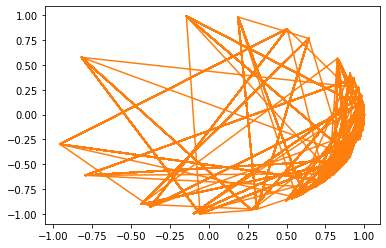

In [ ]:
from itertools import combinations,permutations

X = np.sin(z[:,i])
Y = np.cos(z[:,i])
temp_xy = [[x,y] for x,y in zip(X,Y)]
temp_x=list(permutations(X,2))
temp_y=list(permutations(Y,2))

plt.plot(temp_x,temp_y)

In [ ]:
temp = [1,2,3,4,5]

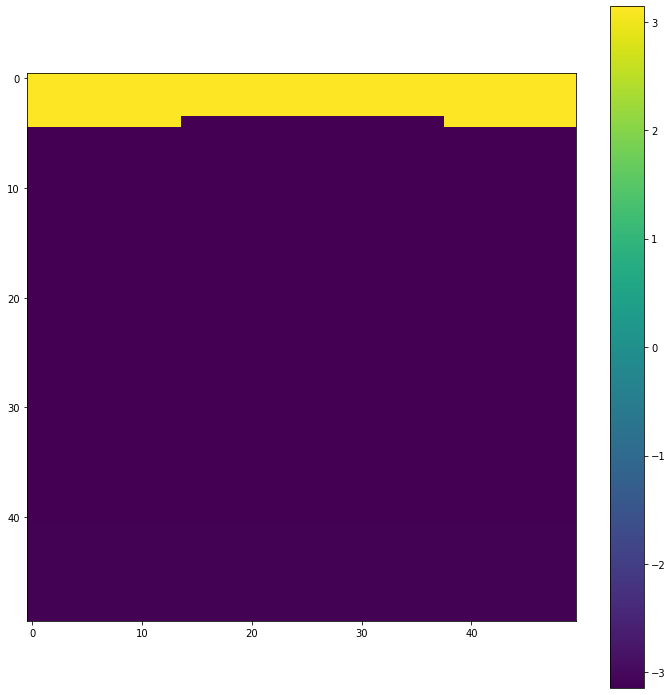

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow((np.diff(z[N_sort])%(2*np.pi)-np.pi)[:,:1*N])
# plt.imshow((z[N_sort]%(2*np.pi)-np.pi)[:,-5*N:])
plt.tight_layout()
plt.colorbar()


In [ ]:
np.diff(z).shape

(300, 100000)

In [ ]:
np.abs(z%(2*np.pi)).shape

(300, 100001)

In [ ]:
'lorentzian'.upper()

'LORENTZIAN'

## Ensemble test

You select NORM and Kc = 1.5957691216057306
Your method is calculated by RK45


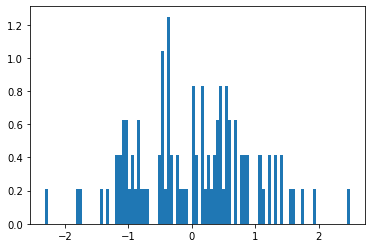

In [6]:
from KURAMOTO_SIM import NORM_LO_HEUNvsSOLV
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, importlib
from functools import partial


importlib.reload(NORM_LO_HEUNvsSOLV)
# DIS = 'LORENTZIAN'.upper() # distribution function of g(w)
DIS = 'NORM'.upper() # distribution function of g(w)
KUR=NORM_LO_HEUNvsSOLV.KURAMOTO(DIS,'RK45')
# KUR=NORM_LO_temp.KURAMOTO(DIS)
plt.hist(KUR.omega_gen(100),density=True,bins=100)
plt.show()
r_raw_N ={}
r_mean_N ={}
t_raw_N ={}
# method에 관련된 문제는 아닌것 같음, 시간 아니면 앙상블의 횟수에 관련된 문제같음

In [ ]:
theta가 움직임이 0인가,single realization, theta랑 theta dot해서 보기,
싱크가 된 오실레이터, 정말로 유지되고 있느지, 


SyntaxError: invalid syntax (Temp/ipykernel_4584/674781753.py, line 1)

In [ ]:
%%time
t,_,r4 = KUR.get_t_z_r(6400,KUR.Kc,400)

RK23
Wall time: 23.8 s


In [ ]:
22*100/120

18.333333333333332

In [ ]:
100*46.4/16
# 까23 22.4
# my Heun 46.4
# my RK4 78.3
# RK45 18.7


290.0

In [ ]:
np.mean(KUR.omega)

0.0002346777841897596

In [2]:
import parmap
step=0.1
rs_last =[]
chi = lambda x,N : N*np.mean(np.mean(x**2,axis=1) -np.mean(x,axis=1)**2)
chis =[]

rtol 1e-7

104it [41:27, 23.92s/it]                          


Now system size = 3200


C:\Users\kim9y\AppData\Local\Temp/ipykernel_31248/2464300564.py:57: RankWarning: Polyfit may be poorly conditioned
  KUR.poly_exp(Ns,rs_last,'r','N')
C:\Users\kim9y\AppData\Local\Temp/ipykernel_31248/2464300564.py:64: RankWarning: Polyfit may be poorly conditioned
  KUR.poly_exp(Ns,chis,'r','N')


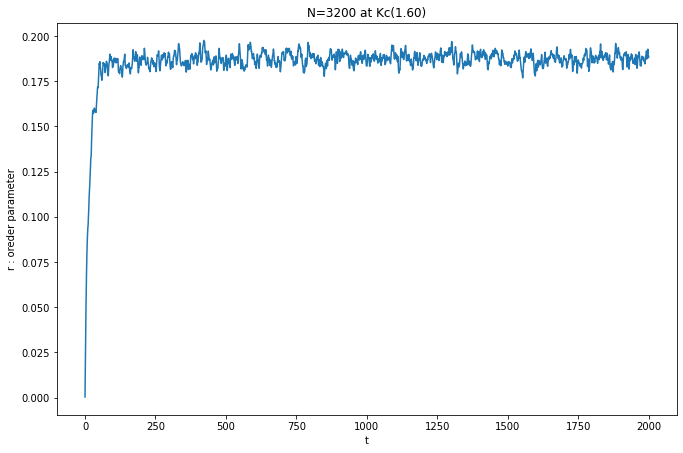

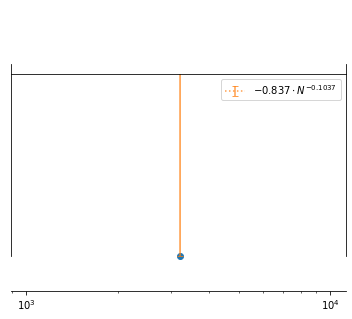

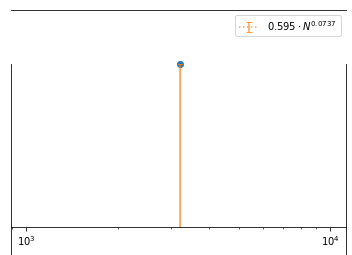

In [3]:
# %%time


# Ns = np.array([6400])
Ns = np.array([3200])
# Ns = np.array([100,120,144,172])#,207,248,298,358,429,515,619,743]) # int 1.2 ratio
# Ns = np.array([100,150,225])#1.5 ratio
for i in range(len(Ns)):
    N= Ns[i]
    ensemble=100
    end=2000
    dt= 0.01
#     TEST_folder='AT_KC'FSS_NEW_CLASS\TEST_simulation\2.ensemble=1000
    TEST_folder='TEST_simulation/1.time_2000'
    # Kc = np.sqrt(8/np.pi)
    # KUR.setting_K_ensemble(KUR.Kc,N,end)
    KUR.setting_K_ensemble(KUR.Kc,N,end)
    plt.figure(figsize=(9.6,6.4))
    rs=[]
    ts=[]
    # Norm_N=(Ns-max(Ns))/(max(Ns)-min(Ns))
    # C=plt.cm.viridis_r(Norm_N)

    c_bar=np.linspace(min(Ns),max(Ns),len(Ns))
    for S in parmap.map(KUR.for_ensemble_at_K,range(ensemble),pm_pbar=True, pm_processes=2):#6
        # 800 까진 16스레드를 다써도 됨, 그 이상은 안됨
        t,r = S
        ts.append(t)
        rs.append(r)
    r_2nd = np.array(rs)[:,-100000:]
    r_tmean = np.mean(np.array(rs)[:,-100000:],axis=1)
    r_mean = np.mean(rs,axis=0)
    # r_last = np.mean(r_mean[-100000:])
    r_last = np.mean(r_tmean)
    chi_N = chi(r_2nd,N)
    chis.append(chi_N)
    # r_last = np.mean(r_mean[-100000//2:])
    rs_last.append(r_last)
    print(f'Now system size = {N}')
    plt.plot(t,r_mean,label=f'N={N}')
    plt.title(f'N={N} at Kc({KUR.Kc:.02f})')
    plt.xlabel('t')
    plt.ylabel('r : oreder parameter')
    plt.tight_layout()
    plt.savefig(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N}.png',dpi=400,transparent=True)
    
    r_raw_N[str(N)]=rs
    r_mean_N[str(N)]=r_mean
    t_raw_N[str(N)]=ts
    
    np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},ar_Kc,rs_raw',r_raw_N[str(N)])
    np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},ar_Kc,ts',t_raw_N[str(N)])
plt.figure()
plt.scatter(Ns,rs_last)
plt.xscale('log')   
plt.yscale('log')
KUR.poly_exp(Ns,rs_last,'r','N')
plt.legend()
plt.savefig(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N vs R.png',dpi=400)
plt.figure()
plt.scatter(Ns,chis)
plt.xscale('log')
plt.yscale('log')
KUR.poly_exp(Ns,chis,'r','N')
plt.legend()


plt.savefig(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N vs R, chi .png',dpi=400)

3200 까진 16코어로 가능, 6400은 조금 줄여야 함

1000초 --> 13코어 가능 1600
1000초 --> 7코어 해보기 3200


In [ ]:
np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},ar_Kc,rs_raw',rs)
np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},ar_Kc,ts',ts)

In [5]:
Ns = np.array([100,200,400,800,1600,3200])

100-800 500 
1600 3200 200
6400 100

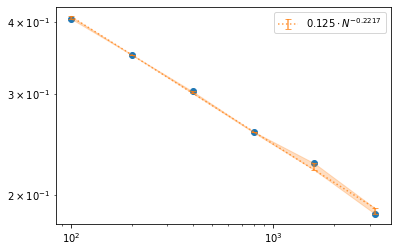

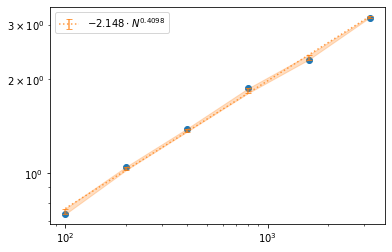

In [7]:
plt.figure()
plt.scatter(Ns[:],rs_last[6:])
plt.xscale('log')
plt.yscale('log')
KUR.poly_exp(Ns[:],rs_last[6:],'r','N')
plt.legend()
plt.savefig(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N vs R.png',dpi=400)
plt.figure()
plt.scatter(Ns[:],chis[6:])
plt.xscale('log')
plt.yscale('log')
KUR.poly_exp(Ns[:],chis[6:],'r','N')
plt.legend()
plt.savefig(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N vs chi.png',dpi=400)


In [ ]:
r_raw_N[str(N)]=rs
r_mean_N[str(N)]=r_mean
t_raw_N[str(N)]=ts

np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},ar_Kc,rs_raw',r_raw_N[str(N)])
np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},ar_Kc,ts',t_raw_N[str(N)])

NameError: name 'rs' is not defined

In [ ]:
N = 200
TEST_folder ='FINAL'
r_old = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N={N},ar_Kc,rs_raw.npy')

In [ ]:
r_old.shape

(1000, 200001)

In [ ]:
len(r_raw_N['1600'])

300

In [ ]:
r_old
r_new =np.array(r_raw_N['1600'])

In [ ]:
r_sum = np.concatenate([r_old,r_new])
# r_raw_N['1600']=r_sum

In [ ]:
r_sum.shape

(500, 200001)

In [ ]:
np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},ar_Kc,rs_raw',r_sum)

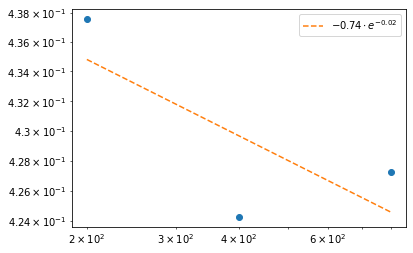

In [ ]:
Ns = np.array([200,400,800])
plt.figure()
plt.scatter(Ns,rs_last)
plt.xscale('log')
plt.yscale('log')
KUR.poly_exp(Ns,rs_last)
plt.legend()
# plt.savefig(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N vs R.png',dpi=400)

In [ ]:
TEST_folder ='TEM'
# "G:\내 드라이브\Colab Notebooks\KURAMOTO\FSS_NORM\KC_CHECK\AT_KC2\100.png"
rs_200 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=200,ar_Kc,rs_raw.npy')
# rs2_200 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=200,ar_Kc,rs_raw2.npy')
ts2_200 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=200,ar_Kc,ts.npy')
rs_400 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=400,ar_Kc,rs_raw.npy')
# rs2_400 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=400,ar_Kc,rs_raw2.npy')
ts2_400 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=400,ar_Kc,ts.npy')

rs_800 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=800,ar_Kc,rs_raw.npy')
# rs2_800 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=800,ar_Kc,rs_raw2.npy')
rs_1600 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=1600,ar_Kc,rs_raw.npy')
# rs_3200 = np.load(f'FSS_NORM/KC_CHECK/AT_KC2/N=3200,ar_Kc,rs_raw.npy')


In [4]:
def read_data(adress,Ns,meantime):
    ''' 
    RETURN all value of evalueate data from adress
    t, N, N_dic, chis, r_tmeans, r_t_each, r_ts
    N_dic : 딕셔너리 형태로 만든 order parameter data
    chis  : dynamic fluctuation을 확인하기 위해서 만든 데이터
    r_tmeans : time avarage and then, ensemble avarage
    r_t_each : 히스토그램을 확인하기 위한 데이터
    r_ts : 앙상블 평균해준 데이터, 시간에 대한 변화를 확인하기 위해서
    '''
    TEST_folder = adress
    N_dic = {}
    for N in Ns:
        N_arr = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N={N},ar_Kc,rs_raw.npy')
        # N_arr = N_arr[np.random.randint(N_arr.shape[0], size=100),:]
        N_dic[str(N)] = N_arr
    t = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N={N},ar_Kc,ts.npy')[0]
    N,r_arr = zip(*N_dic.items())
    Ns = list(map(int,N))
    # cut = lambda x: x[:,5000:15000]
    # cut = lambda x: x[:,-150000:-100000]    
    # cut = lambda x: x[:,10000:20000]    
    # cut = lambda x: x[:,-12500:]    
    # cut2 = lambda x: x[:,-12500:]**2
    time = int(meantime*100)
    cut = lambda x: x[:,-time:]    
    cut2 = lambda x: x[:,-time:]**2
    
    mean = lambda x: np.mean(x)
    e_mean = lambda x: np.mean(x,axis=0)
    t_mean = lambda x: np.mean(x,axis=1)
    cut_r = list((map(cut,r_arr)))
    cut_r2 = list((map(cut2,r_arr)))

    chi = lambda x,N : N*np.mean(np.mean(x**2,axis=1) -np.mean(x,axis=1)**2)
    r_tmeans = list(map(mean,list(map(t_mean,cut_r))))
    r2_tmeans = list(map(mean,list(map(t_mean,cut_r2))))
    r_t_each = list(map(t_mean,cut_r))

    r_ts = list(map(e_mean, r_arr))
    chis = [chi(cut_r[i],N_) for i,N_ in enumerate(Ns)]
    
    return t,N, N_dic, chis, r_tmeans,r2_tmeans, r_t_each, r_ts,

In [ ]:
n_temp =N_dic['100']

NameError: name 'N_dic' is not defined

In [ ]:
np.mean(n_temp,axis=1).shape

NameError: name 'n_temp' is not defined

In [ ]:
np.random.randint(n_temp.shape[0], size=100)

NameError: name 'n_temp' is not defined

In [ ]:
N,r_arr = zip(*r_raw_N.items())
Ns = list(map(int,N))
cut = lambda x: x[:,-10000:]
mean = lambda x: np.mean(x)
e_mean = lambda x: np.mean(x,axis=0)
t_mean = lambda x: np.mean(x,axis=1)
cut_r = list((map(cut,r_arr)))

chi = lambda x,N : N*np.mean(np.mean(x**2,axis=1) -np.mean(x,axis=1)**2)
r_tmeans = list(map(mean,list(map(t_mean,cut_r))))
r_t_each = list(map(t_mean,cut_r))

r_ts = list(map(e_mean, r_arr))
chis = [chi(cut_r[i],N_) for i,N_ in enumerate(Ns)]

In [32]:
Ns=[100,200,400,800,1600,3200,6400,12800]
t,N, N_dic, chis, r_tmeans,r2_tmeans, r_t_each, r_ts = read_data('re_check_rtol1e-6',Ns,100)
# t,N, N_dic2, chis2, r_tmeans2, r_t_each2, r_ts2 = read_data('FINAL',Ns)

Text(0.5, 1.0, 'Histogram of order parameter')

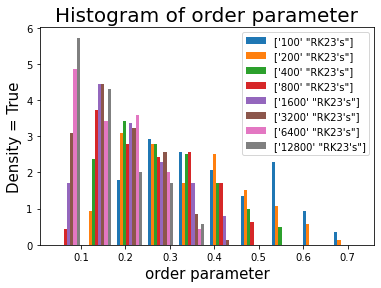

In [33]:
# plt.subplot(211)
# plt.hist(r_t_each2,bins=10,label=[*zip(N,["Heun's"]*len(N))],density=True)
# plt.legend()

# plt.subplot(212)
plt.hist(r_t_each,bins=10,label=[*zip(N,["RK23's"]*len(N))],density=True)
plt.legend()
plt.xlabel('order parameter', fontsize=15)
plt.ylabel('Density = True',fontsize=15)
plt.title('Histogram of order parameter',fontsize=20)
# plt.savefig('./slack용/histogram _rk23.png',dpi=400)

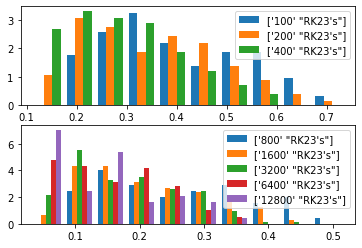

In [34]:
plt.subplot(211)
plt.hist(r_t_each[:3],bins=10,label=[*zip(N,["RK23's"]*len(N[:3]))],density=True)
plt.legend()

plt.subplot(212)
plt.hist(r_t_each[3:],bins=10,label=[*zip(N[3:],["RK23's"]*len(N[3:]))],density=True)
plt.legend()

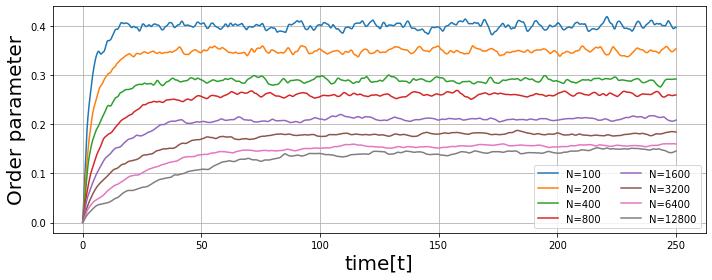

In [39]:
plt.figure(figsize=(10,4))

for i in range(len(r_ts)):
    
    # plt.plot(t,r_ts[i],label=f'N={N[i]} HEUN')
    plt.plot(t[:25000],r_ts[i][:25000],label=f'N={N[i]}')
    # print(np.polyfit(t[-5000:],r_ts[i][-5000:],1))
    # plt.plot(t,r_ts2[i],label=f'N={N[i]} RK23')

plt.grid()
plt.legend(ncol=2)
plt.xlabel('time[t]',fontsize=20)
plt.ylabel('Order parameter',fontsize=20)
# plt.xlim(0,500)
plt.tight_layout()
# plt.savefig("./slack용/5.t vs R .png",dpi=400)

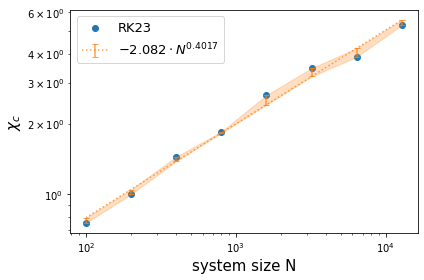

In [40]:
plt.scatter(Ns,chis,label='RK23')
KUR.poly_exp(Ns[0:],chis[0:],'r','N')
# plt.scatter(Ns,chis2,label='RK23')
# KUR.poly_exp(Ns,chis2)

plt.xscale('log')
plt.yscale('log')

plt.legend(fontsize=13)
plt.xlabel('system size N',fontsize=15)
plt.ylabel(r'$\chi_{c}$',fontsize=15)
plt.tight_layout()
# plt.savefig("./slack용/RK23 chi.png",dpi=400)


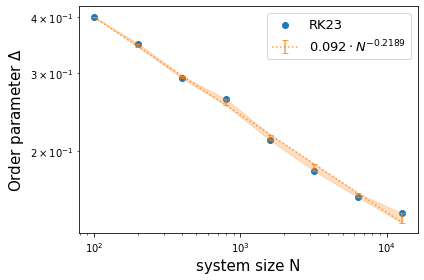

In [41]:
plt.scatter(Ns,r_tmeans,label='RK23')
KUR.poly_exp(Ns[:],r_tmeans[:],'r','N')
# KUR.poly_exp(Ns[:6],r_tmeans[:6])

# plt.scatter(Ns,r2_tmeans,label='RK23 r2')
# KUR.poly_exp(Ns[:6],r2_tmeans[:6])

# plt.scatter(Ns,r_tmeans2,label='RK23')
# KUR.poly_exp(Ns,r_tmeans2)
plt.xscale('log')
plt.yscale('log')
# plt.grid()
plt.legend(fontsize=13)

plt.xlabel('system size N',fontsize=15)
plt.ylabel(r'Order parameter $\Delta$',fontsize=15)
plt.tight_layout()
# plt.savefig("./slack용/N vs R4.png",dpi=400)


In [2]:
1/(0.2122*2)

2.35626767200754

In [ ]:
1/(0.2183*2)

2.2904260192395784

In [ ]:
def make_test_data(N_dic):
    
    chi = lambda x,N : N*np.mean(np.mean(x**2,axis=1) -np.mean(x,axis=1)**2)

In [ ]:
TEST_folder ='FINAL'
rs_100 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=100,ar_Kc,rs_raw.npy')

rs_200 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=200,ar_Kc,rs_raw.npy')
# rs2_200 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=200,ar_Kc,rs_raw2.npy')
ts2_200 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=200,ar_Kc,ts.npy')
rs_400 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=400,ar_Kc,rs_raw.npy')
# rs2_400 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=400,ar_Kc,rs_raw2.npy')
# ts2_400 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=400,ar_Kc,ts.npy')

# rs_800 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=800,ar_Kc,rs_raw.npy')
# # rs2_800 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=800,ar_Kc,rs_raw2.npy')
# rs_1600 = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N=1600,ar_Kc,rs_raw.npy')


In [ ]:
rs_100_total = rs_100[:,-100000:]
rs_200_total = rs_200[:,-100000:]
rs_400_total = rs_400[:,-100000:]
# rs_800_total = rs_800[:,-100000:]
# rs_1600_total = rs_1600[:,-100000:]
# # rs_3200_total = rs_3200[:,-100000:]

In [ ]:
rs_200_total = np.concatenate([rs_200,rs2_200])[:,-100000:]
rs_400_total = np.concatenate([rs_400,rs2_400])[:,-100000:]
rs_800_total = np.concatenate([rs_800,rs2_800])[:,-100000:]
rs_1600_total = rs_1600[:,-100000:]

In [ ]:
chi = lambda x,N : N*np.mean(np.mean(x**2,axis=1) -np.mean(x,axis=1)**2)

In [ ]:
rs_100_tmean = np.mean(rs_100_total,axis=1)
rs_200_tmean = np.mean(rs_200_total,axis=1)
rs_400_tmean = np.mean(rs_400_total,axis=1)
# rs_800_tmean = np.mean(rs_800_total,axis=1)
# rs_1600_tmean = np.mean(rs_1600_total,axis=1)
# rs_3200_tmean = np.mean(rs_3200_total,axis=1)

In [ ]:
chi_100 = chi(rs_100_total,200)

chi_200 = chi(rs_200_total,200)
chi_400 = chi(rs_400_total,400)
# chi_800 = chi(rs_800_total,800)
# chi_1600 = chi(rs_1600_total,1600)
# chi_3200 = chi(rs_3200_total,3200)



In [ ]:
Ns = [100,200,400]#,800,1600]#,3200]
chis = [chi_100,chi_200,chi_400]#,chi_800,chi_1600]#,chi_3200]

NameError: name 'chi_100' is not defined

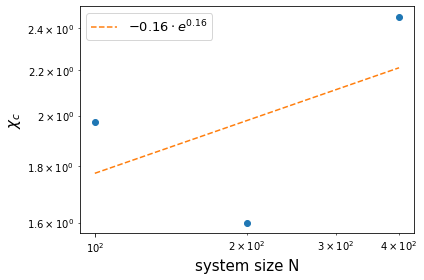

In [ ]:
plt.scatter(Ns,chis)
plt.xscale('log')
plt.yscale('log')
KUR.poly_exp(Ns,chis)
plt.legend(fontsize=13)
plt.xlabel('system size N',fontsize=15)
plt.ylabel(r'$\chi_{c}$',fontsize=15)
plt.tight_layout()
# plt.savefig("./slack용/chi.png",dpi=400)


In [ ]:
np.sqrt(8/np.pi)

1.5957691216057308

In [ ]:
KUR.Kc

1.5957691216057306

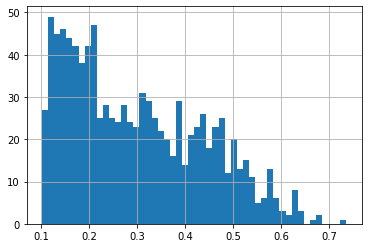

In [ ]:

plt.hist(rs_200_tmean,bins=50)
plt.grid()
plt.show()

In [ ]:
rs_100_mean = np.mean(rs_100_total,axis=0)
rs_200_mean = np.mean(rs_200_total,axis=0)
rs_400_mean = np.mean(rs_400_total,axis=0)
# rs_800_mean = np.mean(rs_800_total,axis=0)
# rs_1600_mean = np.mean(rs_1600,axis=0)

In [ ]:
rs_100_mean = np.mean(rs_100,axis=0)

rs_200_mean = np.mean(rs_200,axis=0)
rs_400_mean = np.mean(rs_400,axis=0)
# rs_800_mean = np.mean(rs_800,axis=0)
# rs_1600_mean = np.mean(rs_1600,axis=0)
# rs_3200_mean = np.mean(rs_3200,axis=0)


In [ ]:
rs_100.shape

(1000, 200001)

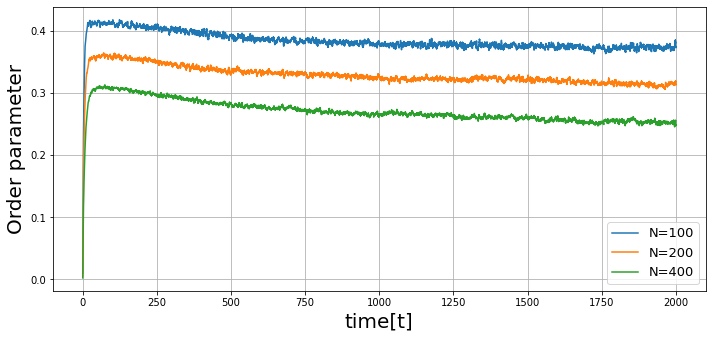

In [ ]:
# plt.figure(dpi=400)
plt.figure(figsize=(10,4.8))
plt.plot(ts2_200[0],rs_100_mean,label='N=100')

plt.plot(ts2_200[0],rs_200_mean,label='N=200')
plt.plot(ts2_200[0],rs_400_mean,label='N=400')

# plt.plot(ts2_400[0],rs_800_mean,label='N=800')
# plt.plot(ts2_400[0],rs_1600_mean,label='N=1600')
# plt.plot(ts2_400[0],rs_3200_mean,label='N=3200')
plt.grid()
plt.legend(fontsize=13)
plt.xlabel('time[t]',fontsize=20)
plt.ylabel('Order parameter',fontsize=20)
plt.tight_layout()
# plt.savefig("./slack용/4.t vs R .png",dpi=400)

In [ ]:
cut = lambda x: x[-100000:]
mean = lambda x: np.mean(x)
# r_100,r_200,r_400,r_800,r_1600 ,t_cut= map(cut,(rs_100_mean,rs_200_mean,rs_400_mean,rs_800_mean,rs_1600_mean,ts2_400[0]))
r_100,r_200,r_400 ,t_cut= map(cut,(rs_100_mean,rs_200_mean,rs_400_mean,ts2_400[0]))

# means= list(map(mean,(rs_200_mean,rs_400_mean,rs_800_mean,rs_1600_mean)))
means= list(map(mean,(rs_100_mean,rs_200_mean,rs_400_mean)))#,rs_800_mean,rs_1600_mean)))


In [ ]:
mean = lambda x: np.mean(x)
# means= list(map(mean,(rs_200_tmean,rs_400_tmean,rs_800_tmean,rs_1600_tmean)))
means= list(map(mean,(rs_100_tmeam,rs_200_tmean,rs_400_tmean)))#,rs_800_tmean,rs_1600_tmean)))


NameError: name 'rs_100_tmea' is not defined

In [ ]:
print(np.polyfit(t_cut,r_200,1))
print(np.polyfit(t_cut,r_400,1))
print(np.polyfit(t_cut,r_800,1))
print(np.polyfit(t_cut,r_1600,1))

[-1.21300310e-05  3.17313094e-01]
[-1.37791802e-05  2.64208084e-01]
[-1.55718623e-05  2.06200001e-01]
[-9.04090588e-06  1.38757663e-01]


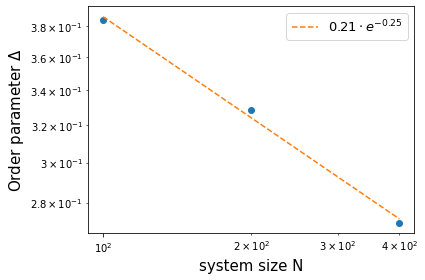

In [ ]:
# N_arr =np.array([200,400,800,1600])
N_arr =np.array([100,200,400])

plt.scatter(N_arr,means)
plt.xscale('log')
plt.yscale('log')
# plt.grid()
KUR.poly_exp(N_arr,means)
plt.legend(fontsize=13)

plt.xlabel('system size N',fontsize=15)
plt.ylabel(r'Order parameter $\Delta$',fontsize=15)
plt.tight_layout()
# plt.savefig("./slack용/N vs R3.png",dpi=400)


## 합쳐진 그래프 만들기 

In [ ]:
import os ; import re; import numpy as np; import matplotlib.pyplot as plt

In [ ]:
ensemble=100;TEST_folder='Scipy_rtol'
DIS = 'NORM'.upper()
# DIS ='LORENTZIAN'.upper()
adress = f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}'
file= os.listdir(adress)

In [ ]:
def get_number(file_name):
    temp = re.findall('^.{2}\d+',file_name)[0]
    a = re.findall('\d+',temp)[0]
    # data.append(a)
    return a
def get_percentage_R_T(raw,ts,percentage):
    R,T=[],[]
    for i,x in enumerate(raw2): 
        x=x[np.where(x<max(x)*(percentage/100))]
        if x.shape[0]==0:
            x_last=0
            x_index=0
        else:
            x_last=x[-1]
            x_index=x.shape[0]
        R.append(x_last)
        T.append(ts[i][x_index])
    return R,T
                

In [ ]:
data = []
rs = {}
r_mean_N = {}
rs_last =[]
for file_name in file:
    if 'rs' in file_name:
        if 'raw' in file_name:
            a = get_number(file_name)
            print(a)
            data.append(a)
            temp=np.load(adress+'/'+file_name)
            r_temp=temp[:,-10000:]
            r_mean = np.mean(temp,axis=0)
            r_mean_N[a]=r_mean
            r_check = temp
            r_last = np.mean(r_temp,axis=(0,1))
            rs_last.append(r_last)
    
    if ('ts' in file_name) and ('.ipynb_checkpoints' not in file_name):
        ts=np.load(adress+'/'+file_name)

100
200
400
800
1600
3200


In [ ]:
r_mean_N

{'200': array([0.005     , 0.00504896, 0.00514113, ..., 0.4558469 , 0.45629178,
        0.45673519]),
 '400': array([0.0025    , 0.00257277, 0.00269537, ..., 0.44507512, 0.44546038,
        0.44584241]),
 '800': array([0.00125   , 0.00128349, 0.00137063, ..., 0.439393  , 0.43970295,
        0.44001009])}

In [ ]:
r_key

('200', '400', '800')

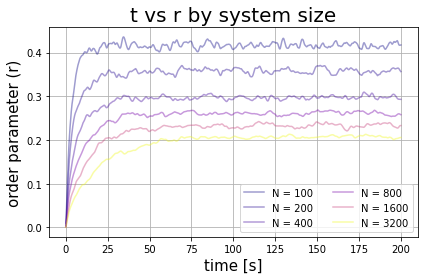

In [ ]:
r_key, r_value = zip(*r_mean_N.items())
# t_key, t_value = zip(*t_raw_N.items())
N_value = list(map(int,r_key))
r_arr, N_arr = map(np.array,(r_value,N_value))
t_arr = ts#np.mean(t_arr,axis=1)
make_label = lambda x : f'N = {x}'
labels = list(map(make_label,r_key))

N_norm = (N_arr- np.min(N_arr))/(np.max(N_arr) - np.min(N_arr))
C_map = plt.cm.plasma(N_norm)

plt.figure()

for i,N in enumerate(N_value):
    plt.plot(t_arr[i],r_arr[i],c=C_map[i],label = labels[i],alpha=0.4)


plt.legend(ncol=2)
plt.title('t vs r by system size',fontsize = 20)
plt.xlabel('time [s]',fontsize=15)
plt.ylabel('order parameter (r)',fontsize=15)
plt.grid()
plt.tight_layout()

# plt.savefig(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/t vs r by order N.png',dpi=400)

## Check test result

In [ ]:
import os ; import re; import numpy as np; import matplotlib.pyplot as plt

In [ ]:
ensemble=100;TEST_folder='AT_KC';endtime=100
# DIS = 'LORENTZIAN'.upper()
DIS ='LORENTZIAN'.upper()
adress = f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}'
file= os.listdir(adress)

In [ ]:
def get_number(file_name):
    temp = re.findall('^.{2}\d+',file_name)[0]
    a = re.findall('\d+',temp)[0]
    # data.append(a)
    return a
def get_percentage_R_T(raw,ts,percentage):
    R,T=[],[]
    for i,x in enumerate(raw2): 
        x=x[np.where(x<max(x)*(percentage/100))]
        if x.shape[0]==0:
            x_last=0
            x_index=0
        else:
            x_last=x[-1]
            x_index=x.shape[0]
        R.append(x_last)
        T.append(ts[i][x_index])
    return R,T
     

In [ ]:
data = []
rs = {}
r_means = []
for file_name in file:
    if 'rs' in file_name:
        if 'raw' in file_name:
            a = get_number(file_name)
            print(a)
            data.append(a)
            temp=np.load(adress+'/'+file_name)
            r_mean=temp[:,-100000:]
            r_check = temp
            rs_last = np.mean(r_mean,axis=(0,1))
            r_means.append(rs_last)
    
    if ('ts' in file_name) and ('.ipynb_checkpoints' not in file_name):
        ts=np.load(adress+'/'+file_name)

100
200
400
800
1600


In [ ]:
r_check

array([[0.000625  , 0.0033663 , 0.00280376, ..., 0.33654478, 0.33835313,
        0.33869836],
       [0.000625  , 0.0033663 , 0.00280376, ..., 0.33654478, 0.33835313,
        0.33869836],
       [0.000625  , 0.0033663 , 0.00280376, ..., 0.33654478, 0.33835313,
        0.33869836],
       ...,
       [0.000625  , 0.0033663 , 0.00280376, ..., 0.33654478, 0.33835313,
        0.33869836],
       [0.000625  , 0.0033663 , 0.00280376, ..., 0.33654478, 0.33835313,
        0.33869836],
       [0.000625  , 0.0033663 , 0.00280376, ..., 0.33654478, 0.33835313,
        0.33869836]])

In [ ]:
# 한거 정리 및, 해보는거 줄이고, 줄인만큼을 발표준비하는데 싱경쓰도록

In [ ]:
for i in range(20):
    print(int(100*(1.2**i)),end =',')

100,150,225,337,

In [ ]:
# 연구동기랑, 정리하고 , 이게 어떤점에서 중요하고 왜 이것을 하는지 정리해 보아라

In [ ]:
# 레포트쓰듯이, 동기 방법, 메소드

# 04 19
각각의 configuratio = N에서 Kc를 찾고, 그 Kc에서의 현상을 볼지, 아니면 00사이즈에서 에서 얻은 Kc에서 해서 그때의 현상을 볼것지

Binder cumulant는 무한대의 사이즈에서 Kc를 찾는 것이고, 지금의 문제는 FSS에서 finite에서 Kc를 못찾고 있는지,
우리가 관심이 있는것은 KC에서의 시스템의 행동을 보고 있는것이다.
Kc가 아닌곳에서는 Trivial한효과를 
보는것이 무한대 차원의 시스템을 보려는 것인지, 낮은 사이즈에서의 현상을 보려는 것인지
정확한 사이즈
각가의 사이즈에서의 경

# K vs R K[0,3,0.1]

You select LORENTZIAN and Kc = 1.0


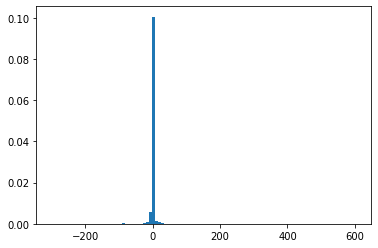

In [ ]:
from KURAMOTO_SIM import NORM_LO ,NORM_LO_temp,NORM_LO_RK23
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, importlib
from functools import partial

importlib.reload(NORM_LO)
importlib.reload(NORM_LO_temp)
importlib.reload(NORM_LO_RK23)

DIS = 'LORENTZIAN'.upper() # distribution function of g(w)
# DIS = 'NORM'.upper() # distribution function of g(w)
KUR=NORM_LO_RK23.KURAMOTO(DIS)
# KUR=NORM_LO_temp.KURAMOTO(DIS)
plt.hist(KUR.omega_gen(1000),density=True,bins=100)
plt.show()


In [2]:
from KURAMOTO_SIM import NORM_LO_HEUNvsSOLV,KURAMOTO_sm
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, importlib
from functools import partial


importlib.reload(NORM_LO_HEUNvsSOLV)
importlib.reload(KURAMOTO_sm)

# DIS = 'LORENTZIAN'.upper() # distribution function of g(w)
DIS = 'NORM'.upper() # distribution function of g(w)
KUR=NORM_LO_HEUNvsSOLV.KURAMOTO(DIS,'RK23')
KUR_sm = KURAMOTO_sm.KURAMOTO_simple(400,0.01)
# KUR=NORM_LO_temp.KURAMOTO(DIS)
# plt.hist(KUR.omega_gen(100),density=True,bins=100)
# plt.show()

You select NORM and Kc = 1.5957691216057306
Your method is calculated by RK23


In [ ]:
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 20,
          }
plt.rcParams.update(parameters)

In [ ]:
import parmap
step=0.1
add_step = 0
Ns = [100,200,400,800,1600]
for N in Ns:
    Ks = np.arange(0+add_step,3+step+add_step,step)
    r_raws = []
    rs_last =[]
    r_means =[]
    plt.figure(figsize=(18,6))
    TEST_folder='RK23[0,3,0.1]'

    ensemble=200
    end=400
    dt= 0.01
    for S in parmap.map(KUR.ensemble_t_r_rs,Ks,N,end,dt,pm_pbar=True, pm_processes=13):
        t,r_mean,r_raw = S
        r_raws.append(r_raw)
        r_means.append(r_mean)
        r_last = np.mean(r_mean[-12500:])
        rs_last.append(r_last)

    Ks_mean = (Ks - min(Ks))/(max(Ks)-min(Ks))
    C = plt.cm.plasma_r(Ks_mean,alpha=0.6)
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    cax = plt.scatter(Ks,rs_last,c=Ks,cmap = 'plasma_r',alpha=0.6)
    plt.scatter(Ks,rs_last)
    plt.title('Order parameter', fontsize = 15)
    plt.xlabel('Coupling constant K',fontsize = 15)
    plt.ylabel('Order parameter r',fontsize = 15)
    plt.vlines(KUR.Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')
    plt.legend()



    for i,K in enumerate(Ks):
        plt.subplot(122)
        plt.plot(t,r_means[i],c=C[i])

    plt.xlabel('time[s]', fontsize=15)
    plt.title('Time vs r', fontsize=15)

    ax = plt.gca()
    c_ax =plt.colorbar(cax,ax=ax,boundaries=Ks)
    c_ax.ax.set_xlabel('K value',fontsize=12)
    plt.suptitle(f'N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}),ensemble={ensemble}',fontsize=20)
    plt.tight_layout()
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).png',dpi=400,transparent=True)
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).svg',dpi=400,format='svg')

    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ts',t)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},rs',r_means)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},raw_rs',r_raws)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ks',Ks)

  0%|          | 0/31 [00:20<?, ?it/s]


KeyboardInterrupt: 

<Figure size 1296x432 with 0 Axes>

In [ ]:
import parmap
step=0.1
add_step = 0.05
Ns = [12800]
for N in Ns:
    Ks = np.arange(0+add_step,3+step+add_step,step)
    r_raws = []
    rs_last =[]
    r_means =[]
    plt.figure(figsize=(18,6))
    TEST_folder='FINAL_NORM[0.05,3.05,0.1]'

    ensemble=50
    end=250
    dt= 0.01
    for S in parmap.map(KUR.ensemble_t_r_rs,Ks,N,end,dt,pm_pbar=True, pm_processes=2):
        t,r_mean,r_raw = S
        r_raws.append(r_raw)
        r_means.append(r_mean)
        r_last = np.mean(r_mean[-12500:])
        rs_last.append(r_last)

    Ks_mean = (Ks - min(Ks))/(max(Ks)-min(Ks))
    C = plt.cm.plasma_r(Ks_mean,alpha=0.6)
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    cax = plt.scatter(Ks,rs_last,c=Ks,cmap = 'plasma_r',alpha=0.6)
    plt.scatter(Ks,rs_last)
    plt.title('Order parameter', fontsize = 15)
    plt.xlabel('Coupling constant K',fontsize = 15)
    plt.ylabel('Order parameter r',fontsize = 15)
    plt.vlines(KUR.Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')
    plt.legend()



    for i,K in enumerate(Ks):
        plt.subplot(122)
        plt.plot(t,r_means[i],c=C[i])

    plt.xlabel('time[s]', fontsize=15)
    plt.title('Time vs r', fontsize=15)

    ax = plt.gca()
    c_ax =plt.colorbar(cax,ax=ax,boundaries=Ks)
    c_ax.ax.set_xlabel('K value',fontsize=12)
    plt.suptitle(f'N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}),ensemble={ensemble}',fontsize=20)
    plt.tight_layout()
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).png',dpi=400,transparent=True)
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).svg',dpi=400,format='svg')

    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ts',t)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},rs',r_means)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},raw_rs',r_raws)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ks',Ks)

 26%|██▌       | 8/31 [4:45:01<13:39:27, 2137.73s/it]


In [ ]:
import parmap
step=0.1
add_step = 0.05
Ns = [25600]
for N in Ns:
    Ks = np.arange(0+add_step,3+step+add_step,step)
    r_raws = []
    rs_last =[]
    r_means =[]
    plt.figure(figsize=(18,6))
    TEST_folder='FINAL_NORM[0.05,3.05,0.1]'

    ensemble=10
    end=250
    dt= 0.01
    for S in parmap.map(KUR.ensemble_t_r_rs,Ks,N,end,dt,pm_pbar=True, pm_processes=1):
        t,r_mean,r_raw = S
        r_raws.append(r_raw)
        r_means.append(r_mean)
        r_last = np.mean(r_mean[-12500:])
        rs_last.append(r_last)

    Ks_mean = (Ks - min(Ks))/(max(Ks)-min(Ks))
    C = plt.cm.plasma_r(Ks_mean,alpha=0.6)
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    cax = plt.scatter(Ks,rs_last,c=Ks,cmap = 'plasma_r',alpha=0.6)
    plt.scatter(Ks,rs_last)
    plt.title('Order parameter', fontsize = 15)
    plt.xlabel('Coupling constant K',fontsize = 15)
    plt.ylabel('Order parameter r',fontsize = 15)
    plt.vlines(KUR.Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')
    plt.legend()



    for i,K in enumerate(Ks):
        plt.subplot(122)
        plt.plot(t,r_means[i],c=C[i])

    plt.xlabel('time[s]', fontsize=15)
    plt.title('Time vs r', fontsize=15)

    ax = plt.gca()
    c_ax =plt.colorbar(cax,ax=ax,boundaries=Ks)
    c_ax.ax.set_xlabel('K value',fontsize=12)
    plt.suptitle(f'N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}),ensemble={ensemble}',fontsize=20)
    plt.tight_layout()
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).png',dpi=400,transparent=True)
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).svg',dpi=400,format='svg')

    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ts',t)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},rs',r_means)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},raw_rs',r_raws)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ks',Ks)

In [ ]:
?KUR_sm.ensemble_t_r_rs

Signature: KUR_sm.ensemble_t_r_rs(K, N, ensemble=100)
Docstring: <no docstring>
File:      g:\내 드라이브\colab notebooks\kuramoto\kuramoto_sim\kuramoto_sm.py
Type:      method


82it [11:52,  8.69s/it]                          
82it [18:11, 13.32s/it]                          
82it [30:45, 22.51s/it]                          
82it [58:19, 42.68s/it]                           


<Figure size 1296x432 with 0 Axes>

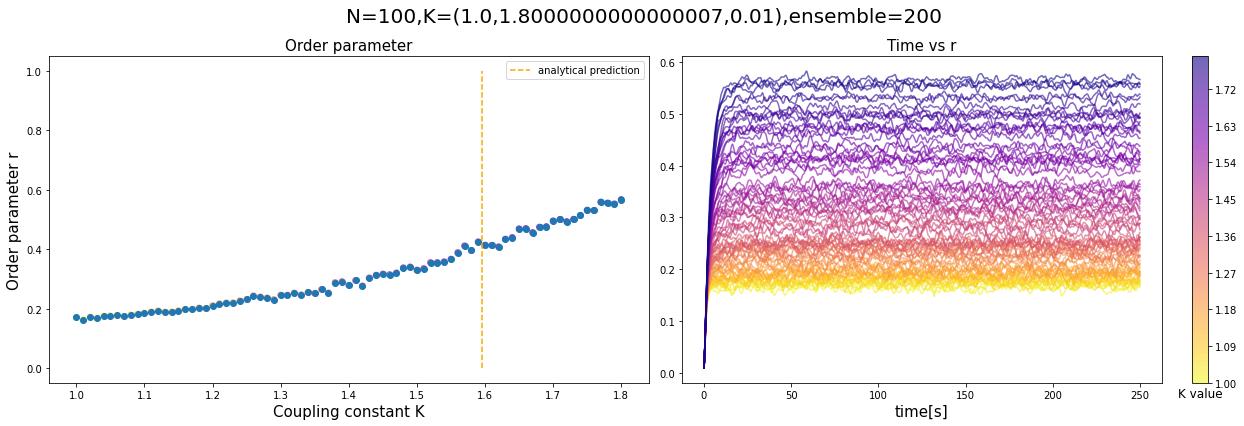

<Figure size 1296x432 with 0 Axes>

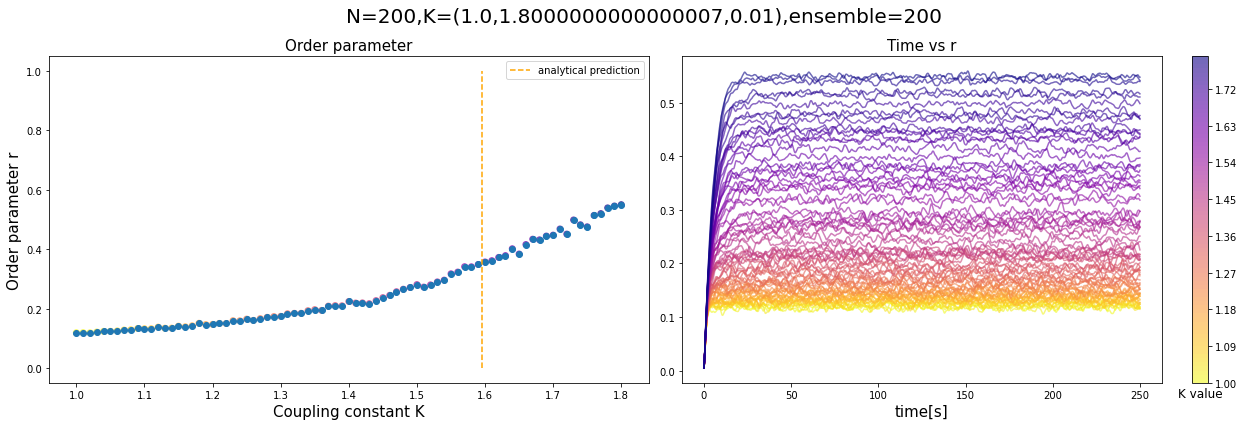

<Figure size 1296x432 with 0 Axes>

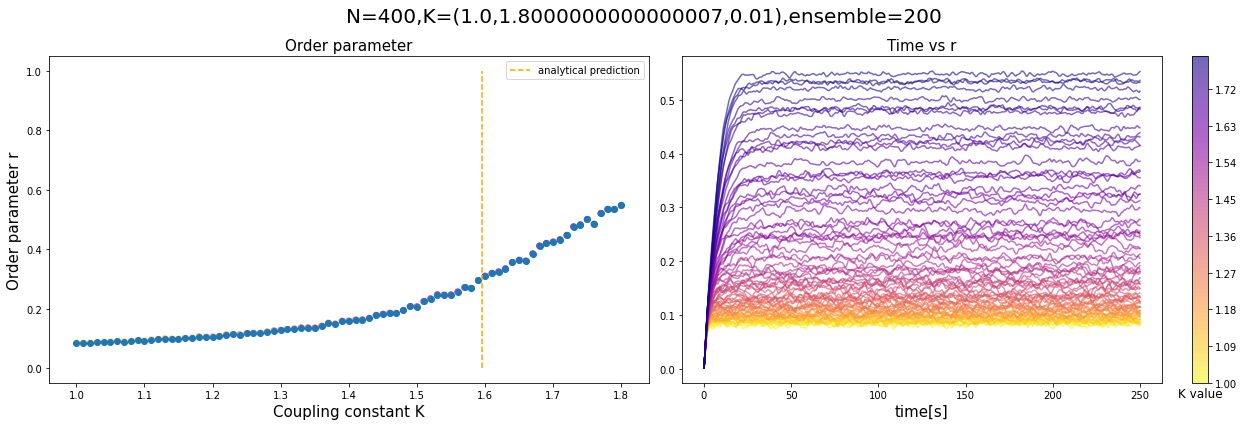

<Figure size 1296x432 with 0 Axes>

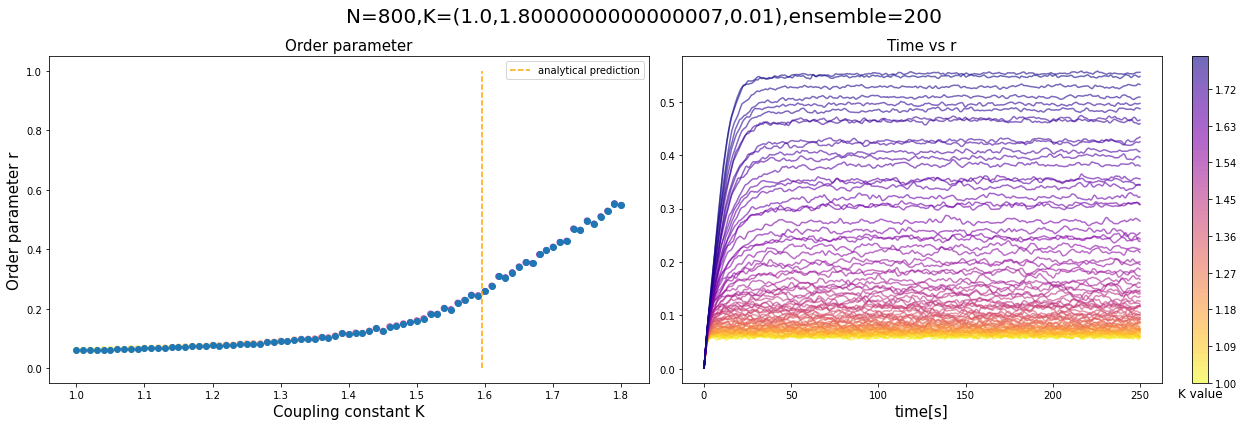

In [ ]:
import parmap
step=0.01
Ns = [100,200,400,800]
for N in Ns:
    Ks = np.arange(1.0,1.8+step,step)
    r_raws = []
    rs_last =[]
    r_means =[]
    plt.figure(figsize=(18,6))
    TEST_folder='FINAL_NORM[1.0,1.8,0.01]'

    ensemble=200

    for S in parmap.map(KUR_sm.ensemble_t_r_rs,Ks,N,ensemble,pm_pbar=True, pm_processes=16):
        t,r_mean,r_raw = S
        r_raws.append(r_raw)
        r_means.append(r_mean)
        r_last = np.mean(r_mean[-12500:])
        rs_last.append(r_last)

    Ks_mean = (Ks - min(Ks))/(max(Ks)-min(Ks))
    C = plt.cm.plasma_r(Ks_mean,alpha=0.6)
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    cax = plt.scatter(Ks,rs_last,c=Ks,cmap = 'plasma_r',alpha=0.6)
    plt.scatter(Ks,rs_last)
    plt.title('Order parameter', fontsize = 15)
    plt.xlabel('Coupling constant K',fontsize = 15)
    plt.ylabel('Order parameter r',fontsize = 15)
    plt.vlines(KUR.Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')
    plt.legend()



    for i,K in enumerate(Ks):
        plt.subplot(122)
        plt.plot(t,r_means[i],c=C[i])

    plt.xlabel('time[s]', fontsize=15)
    plt.title('Time vs r', fontsize=15)

    ax = plt.gca()
    c_ax =plt.colorbar(cax,ax=ax,boundaries=Ks)
    c_ax.ax.set_xlabel('K value',fontsize=12)
    plt.suptitle(f'N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}),ensemble={ensemble}',fontsize=20)
    plt.tight_layout()
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).png',dpi=400,transparent=True)
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).svg',dpi=400,format='svg')

    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ts',t)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},rs',r_means)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},raw_rs',r_raws)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ks',Ks)

In [ ]:
# TEST_folder='FINAL_NORM[1.0,1.8,0.01]'

# for N in Ns:
#     raw_rs_100 = np.load(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=100,raw_rs.npy')
#     raw_rs_200 = np.load(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=200,raw_rs.npy')
#     ts_300 = np.load(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=100,ts.npy')
#     Ks_300 = np.load(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=200,Ks.npy')
#     raw_rs_300 = np.concatenate([raw_rs_100,raw_rs_200],axis=1)
#     rs_300 = np.mean(raw_rs_300,axis=1)
    
#     np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=300,raw_rs',raw_rs_300)
#     np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=300,rs',rs_300)
#     np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=300,ts',ts_300)
#     np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=300,ks',Ks_300)

In [ ]:
Ks_300 = np.load(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=200,Ks.npy')
Ks_300

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 ])

In [ ]:
ts_200 = np.load(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble=100,ts.npy')
ts_200.shape

(25001,)

In [ ]:
np.mean(rs_300[:,-10000:],axis=1)

array([0.05940886, 0.05952528, 0.06038683, 0.06075747, 0.06119111,
       0.06130759, 0.06418546, 0.06299036, 0.06431173, 0.06435928,
       0.06636873, 0.06713698, 0.06808198, 0.0683003 , 0.06865709,
       0.07013076, 0.07090048, 0.07209794, 0.07281862, 0.07349691,
       0.07533714, 0.07632955, 0.07763032, 0.07874361, 0.07986941,
       0.08093902, 0.08163249, 0.08215364, 0.08666484, 0.08712415,
       0.08918488, 0.09040296, 0.09429856, 0.09496848, 0.09718363,
       0.0991373 , 0.10387197, 0.10471173, 0.10888798, 0.1136367 ,
       0.11292685, 0.11880068, 0.11949981, 0.12402446, 0.13238982,
       0.12969136, 0.13935099, 0.14348847, 0.15054609, 0.15467223,
       0.15842648, 0.16739794, 0.17907034, 0.18409082, 0.19943371,
       0.19970525, 0.21326212, 0.22698622, 0.24062297, 0.25019979,
       0.25856372, 0.27872726, 0.30289654, 0.30982415, 0.31964882,
       0.33975959, 0.35125862, 0.36539121, 0.38783133, 0.39902738,
       0.40828754, 0.42726351, 0.43344543, 0.46780126, 0.46374

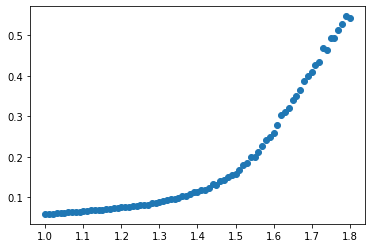

In [ ]:
plt.scatter(Ks,np.mean(rs_300[:,-10000:],axis=1))

In [ ]:
rs_300 = np.mean(raw_rs_300,axis=1)

(81, 25001)

In [ ]:
# %%time
import parmap
step=0.1
Ns = [12800]
for N in Ns:
    Ks = np.arange(0,3+step,step)
    rs_last =[]

    plt.figure(figsize=(18,6))
    TEST_folder='FINAL_NORM[0,3,0.1]'

    r_raw_K = {}
    r_mean_K = {}
    t_raw_K = {}

    for K in Ks:
        ensemble=200
        end=250
        dt= 0.01
        KUR.setting_K_ensemble(K,N,end)
        rs=[]
        ts=[]
    #     Norm_N=(Ns-max(Ns))/(max(Ns)-min(Ns))
    #     C=plt.cm.viridis_r(Norm_N)

    #     c_bar=np.linspace(min(Ns),max(Ns),len(Ns))
        for S in parmap.map(KUR.for_ensemble_at_K,range(ensemble),pm_pbar=True, pm_processes=16):
            t,r = S
            ts.append(t)
            rs.append(r)
            
        r_mean = np.mean(rs,axis=0)
        r_last = np.mean(r_mean[-12500:])
        rs_last.append(r_last)
        r_raw_K[str(K)]=rs
        r_mean_K[str(K)]=r_mean
        t_raw_K[str(K)]=ts

        
    # np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},end={end},rs_raw',r_raw_N[str(N)])
    # np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},end={end},ts',ts)
    # np.save(f'./FSS_NEW_CLASS/{TEST_folder}/{DIS}/N={N},end={end},Ks',Ks)

    Ks_mean = (Ks - min(Ks))/(max(Ks)-min(Ks))
    C = plt.cm.plasma_r(Ks_mean,alpha=0.6)
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    cax = plt.scatter(Ks,rs_last,c=Ks,cmap = 'plasma_r',alpha=0.6)
    plt.scatter(Ks,rs_last)
    plt.title('Order parameter', fontsize = 15)
    plt.xlabel('Coupling constant K',fontsize = 15)
    plt.ylabel('Order parameter r',fontsize = 15)
    plt.vlines(KUR.Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')
    plt.legend()


    for i,K in enumerate(Ks):
        plt.subplot(122)
        plt.plot(t_raw_K[str(K)][0],r_mean_K[str(K)],c=C[i])

    plt.xlabel('time[s]', fontsize=15)
    plt.title('Time vs r', fontsize=15)

    ax = plt.gca()
    c_ax =plt.colorbar(cax,ax=ax,boundaries=Ks)
    c_ax.ax.set_xlabel('K value',fontsize=12)
    plt.suptitle(f'N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}),ensemble={ensemble}',fontsize=20)
    plt.tight_layout()
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).png',dpi=400,transparent=True)
    plt.savefig(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}).svg',dpi=400,format='svg')

    r_key, r_raw_value = zip(*r_raw_K.items())
    r_key, r_value = zip(*r_mean_K.items())
    t_key, t_value = zip(*t_raw_K.items())
    rs, ts, raw_rs = map(np.array,(r_value,t_value,r_raw_value))

    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ts',ts[0])
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},rs',rs)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},raw_rs',raw_rs)
    np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ks',Ks)

  2%|▏         | 1/50 [01:17<1:02:58, 77.12s/it]

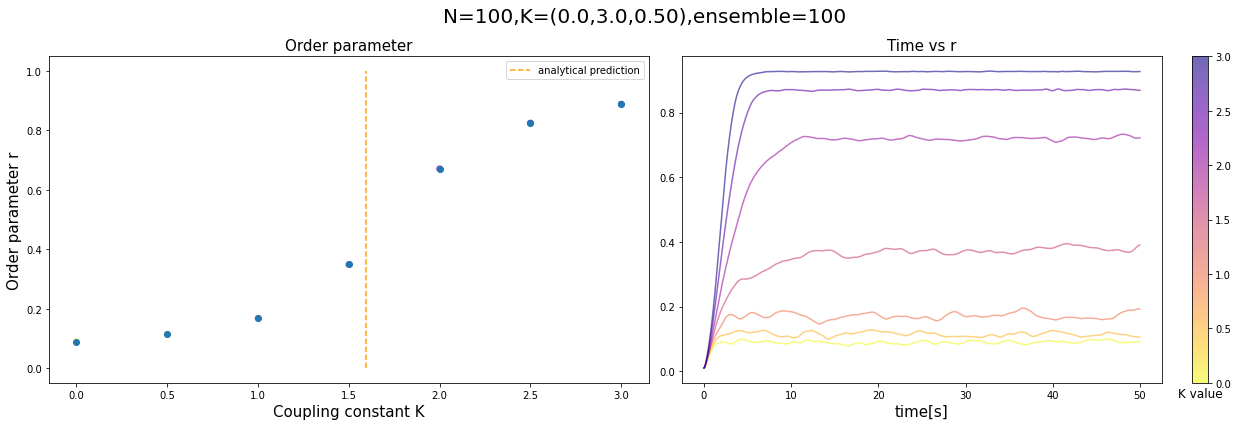

In [ ]:
Ks_mean = (Ks - min(Ks))/(max(Ks)-min(Ks))
C_bar = plt.cm.plasma_r(Ks_mean,alpha=0.6)
plt.figure(figsize=(18,6))
plt.subplot(121)
cax = plt.scatter(Ks,rs_last,c=Ks,cmap = 'plasma_r',alpha=0.6)
plt.scatter(Ks,rs_last)
plt.title('Order parameter', fontsize = 15)
plt.xlabel('Coupling constant K',fontsize = 15)
plt.ylabel('Order parameter r',fontsize = 15)
plt.vlines(KUR.Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')
plt.legend()


for i,K in enumerate(Ks):
    plt.subplot(122)
    plt.plot(t_raw_K[str(K)][0],r_mean_K[str(K)],c=C_bar[i])

plt.xlabel('time[s]', fontsize=15)
plt.title('Time vs r', fontsize=15)

ax = plt.gca()
c_ax =plt.colorbar(cax,ax=ax)
c_ax.ax.set_xlabel('K value',fontsize=12)
plt.suptitle(f'N={N},K=({Ks.min()},{Ks.max()},{Ks[1]-Ks[0]:.02f}),ensemble={ensemble}',fontsize=20)
plt.tight_layout()

In [ ]:
r_key, r_raw_value = zip(*r_raw_K.items())
r_key, r_value = zip(*r_mean_K.items())
t_key, t_value = zip(*t_raw_K.items())
rs, ts, raw_rs = map(np.array,(r_value,t_value,r_raw_value))

np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ts',ts[0])
np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},rs',rs)
np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},raw_rs',raw_rs)
np.save(f'./FSS_NEW_CLASS/K_R/{TEST_folder}/N={N},ensemble={ensemble},ks',ks)

In [ ]:
ts[0].shape

(100, 5001)

## CHECK THE CHI

# 데이터 분석용 파일 만들기

In [1]:
import os ; import re; import numpy as np; import matplotlib.pyplot as plt

In [2]:
'./KURAMOTO/FSS/KS_step=0.1/TEST2/ensemble=100'

'./KURAMOTO/FSS/KS_step=0.1/TEST2/ensemble=100'

In [3]:
# TEST_folder='TEST[1.2,2.0,0.05]'

# TEST_folder='TEST[1.2,2.0,0.05]'
TEST_folder='FINAL_NORM[0,3.05,0.05]'
# TEST_folder='FINAL_NORM[1.0,1.8,0.01]'
# TEST_folder='FINAL_NORM[0,3,0.02]'
dir=f'./FSS_NEW_CLASS/K_R/{TEST_folder}'

# dir='./FSS/KS_step=0.1/TEST2/ensemble=100'
file= os.listdir(dir)

In [4]:
def get_number(file_name):
    temp = re.findall('^.{2}\d+',file_name)[0]
    a = re.findall('\d+',temp)[0]
    # data.append(a)
    return a
def get_percentage_R_T(raw,ts,percentage):
    R,T=[],[]
    for i,x in enumerate(raw2): 
        x=x[np.where(x<max(x)*(percentage/100))]
        if x.shape[0]==0:
            x_last=0
            x_index=0
        else:
            x_last=x[-1]
            x_index=x.shape[0]
        R.append(x_last)
        T.append(ts[i][x_index])
    return R,T
                

In [5]:
rs,rs2,rs4={},{},{}
rs_avg,rs2_avg,rs4_avg={},{},{}

rs2_last={}
rs2_avg_last={}
rs4_last={}
rs_raw={}
rs4_max={}
rs_last={}
R_90,T_90={},{}
R_70,T_70={},{}

data = []
for file_name in file:
    if 'rs' in file_name:
        if 'raw' in file_name:
            a = get_number(file_name)
            data.append(a)
            temp=np.load(dir+'/'+file_name)
            # r_time=temp[:,:,-50000:]
            # r_time=temp[:,:,10000:25000]
            r_time=temp[:,:,-10000:]
            r2_time=r_time**2
            r4_time=r_time**4
            rs_last[a]=np.mean(r_time,axis=(1,2))#axis 2 time, 1 ensemble, 0 Ks
            rs2_avg_last[a]=np.mean(np.mean(r_time,axis=2)**2,axis=1)
            rs2_last[a]=np.mean(np.mean(r2_time,axis=2),axis=1)
            rs_avg[a]=np.mean(r_time,axis=2)
            rs2_avg[a]=np.mean(r2_time,axis=2)
            rs4_avg[a]=np.mean(r4_time,axis=2)
            print(file_name)
            """ 
            TO get 90% point to select profer time of simulation end
            """
            raw=np.load(dir+'/'+file_name)
            raw2 = np.mean(raw,axis=1)
                
            # R_90[a],T_90[a]=get_percentage_R_T(raw2,ts,90)
            # R_70[a],T_70[a]=get_percentage_R_T(raw2,ts,70)
            
            
            # rs_raw[a]=np.load(dir+'/'+file_name)
        elif 'max' in file_name:
            test=np.load(dir+'/'+file_name)
        elif 'last' in file_name:
            a = get_number(file_name)
            temp=np.load(dir+'/'+file_name)
            rs_last[a]=np.load(dir+'/'+file_name)

        else:
            
            if 'rs2' in file_name:
                a = get_number(file_name)
                # data.append(a)
                print(file_name)
                rs2[a]=np.load(dir+'/'+file_name)
                # rs2_last[a]=np.mean(np.load(dir+'/'+file_name)[:,-500:],axis=1)
                test=np.load(dir+'/'+file_name)

            elif 'rs4' in file_name:
                a = get_number(file_name)
                rs4[a]=np.load(dir+'/'+file_name)
                # rs4_last[a]=np.mean(np.load(dir+'/'+file_name)[:,-500:],axis=1)
                test=np.load(dir+'/'+file_name)
            else:
                a = get_number(file_name)
                rs[a]=np.load(dir+'/'+file_name)
                # rs_last[a]=np.mean(np.load(dir+'/'+file_name)[:,-500:],axis=1)
                test=np.load(dir+'/'+file_name)

    if 'ks' in file_name:
        ks=np.load(dir+'/'+file_name)
        
    if ('ts' in file_name) and ('.ipynb_checkpoints' not in file_name):
        ts=np.load(dir+'/'+file_name)
data=list(map(int,data))
data.sort()
data=list(map(str,data))

N=6400,ensemble=100,raw_rs.npy
N=3200,ensemble=100,raw_rs.npy
N=100,ensemble=200,raw_rs.npy
N=200,ensemble=200,raw_rs.npy
N=400,ensemble=200,raw_rs.npy
N=800,ensemble=200,raw_rs.npy
N=1600,ensemble=200,raw_rs.npy
N=12800,ensemble=50,raw_rs.npy


In [ ]:
ks = np.arange(0,3.05+0.05,0.05)

### 적절한 시간 설정하기 END time

In [ ]:
def graph_K_vs_T(ks,T,data,percentage,Kc,ts=ts):
    plt.figure(facecolor='white',figsize=(10,4.4),dpi=200)
    maxs=0
    plt.subplot(121)
    for name in data:
        plt.plot(ks,T[name],label=f'N={name}')
        max1=np.max(T[name])
        maxs=max(maxs,max1)
    plt.legend()
    plt.xlabel('K : coupling constant')
    plt.ylabel(f'T : time to get max {percentage}%')
    plt.title(f'K vs T graph | end time {int(ts[0][-1])}s')
    plt.vlines(Kc,0,maxs,ls='--')
    
    plt.subplot(122)
    for name in data:
        index=int(np.where(ks==Kc)[0])
        plt.plot(int(name),T[name][index],'s',label=f'N={name}')
    plt.legend()
    plt.xlabel('N : system size')
    plt.ylabel('T : time to get max 70%')
    plt.title('Saturated time at Kc : 1')

In [ ]:
graph_K_vs_T(ks,T_90,data,90,KUR.Kc)
# plt.savefig('End time test.png')
plt.show()
# graph_K_vs_T(ks,T_90,data,90,KUR.Kc)
plt.subplot(121)
plt.xlim(0.9,1.1)

In [ ]:
plt.figure(facecolor='white',dpi=200)
for name in data:
    plt.plot(ks,T_70[name],label=f'N={name}')
plt.legend()
plt.xlabel('K : coupling constant')
plt.ylabel('T : time to get max 70%')
plt.title('K vs T graph')

### To Do 22/04/01
1. Binder cumulant
2. Mean field exponents --> 논문 확인해 보기
3. Scaling function --> 논문 확인해 보기


## Binder cumulant
> $ U_{L}=1-{\frac  {{\langle s^{4}\rangle }_{L}}{3{\langle s^{2}\rangle }_{L}^{2}}} $  
> criticla point를 찾기위한 후보중 하나.  
> 데이터를 얻고 나서 그사이 간격을 좀더 좁혀서 해보자.  

In [ ]:
ks

NameError: name 'ks' is not defined

In [53]:
def U(rs2,rs4):
    '''binder cumulant, get last rs, about ks'''
    return 1-(rs4)/(3*(rs2)**2)

def U2(rs2,rs4):
    '''binder cumulant, get last rs, about ks'''
    return np.mean(1-(rs4)/(3*(rs2)**2),axis=1)

def chi_1(K,r,r2,N):
    """
    dynamic flucations of the order parameter by measuting the quantity
    get : r, r2, N
    equation : N[<r**2>-<r>**2]
    return equation
    """
    Dipersion = np.mean(r2 - r**2,axis=1)
    return N*Dipersion
def h(x,gamma):
    '''
    scailing function 
    x= 0 constant, x>>1 x^-gamma, (-x)^-gamma
    '''
    if x == 0:
        return 
def f(x,beta,nu):
    if x>1:
        return x**beta
    elif x<-1:
        return (-x)**(beta-(nu/2))
    else: return 1
def FSS(K,N,beta,nu):
    a = N**(beta/nu)
    
    Kc=1
    b = f((K-Kc)*N**1/nu,beta,nu)
    
# def chi_2(,r,r2,N)

    

100 = 1.3	200 = 1.4500000000000002	400 = 1.55	800 = 1.5	1600 = 1.55	3200 = 1.55	6400 = 1.55	12800 = 1.6	

Text(0, 0.5, 'U : binder cumulant')

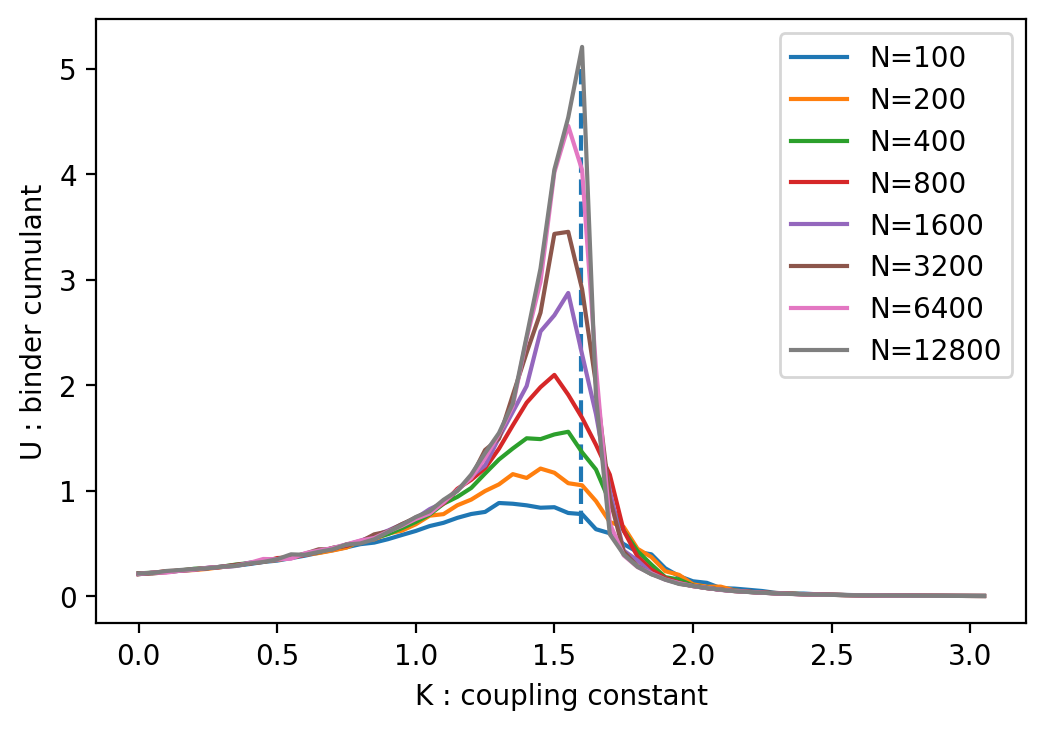

In [ ]:
plt.figure(facecolor='white',dpi=200)
FSS_result=[]
for name in data:
    # plt.plot(ks,U(np.mean(rs2[name],axis=1),np.mean(rs4[name],axis=1)))
    # plt.plot(ks,U(np.mean(rs2[name],axis=1),np.mean(rs4[name],axis=1)),label=f'{name}')
    # plt.plot(ks,U(np.mean(rs2_avg[name],axis=1),np.mean(rs4_avg[name],axis=1)),label=f'{name}')
    N=int(name)
#     Fss = []
#     for x in 

    Chi = chi_1(ks,rs_avg[name],rs2_avg[name],N)
    print(N,'=', ks[np.argmax(Chi)],sep= ' ',end ='\t')
    plt.plot(ks,Chi,label=f'N={N}')
    # plt.plot(ks,U2(rs2_avg[name],rs4_avg[name]),label=f'{name}')
    # plt.plot(ks,U(rs2_last[name],rs4_last[name]))
plt.vlines(KUR.Kc,5,0.68,ls='--')
plt.legend()
plt.xlabel('K : coupling constant')
plt.ylabel('U : binder cumulant')
# plt.savefig('binder_cumulant2.png')
# plt.xlim(1.0-0.3,1+0.3)

In [ ]:
plt.figure(figsize=(16,10))
for name in data:
#     plt.plot(ks,U(np.mean(rs2[name],axis=1),np.mean(rs4[name],axis=1)))
    # plt.plot(ks,U(np.mean(rs2[name],axis=1),np.mean(rs4[name],axis=1)),label=f'{name}')
    # plt.plot(ks,U2(rs2[name],rs4[name]),label=f'{name}')
    # plt.plot(ks,U(rs2_last[name],rs4_last[name]))

plt.legend()
plt.vlines(KUR.Kc,0.3,0.7,ls='--')
plt.xlim(1.0-0.3,1+0.3)

IndentationError: expected an indented block (Temp/ipykernel_29128/2510653697.py, line 8)

In [ ]:
16**5

1048576

### N vs $[<\Delta^2>]$ at Kc

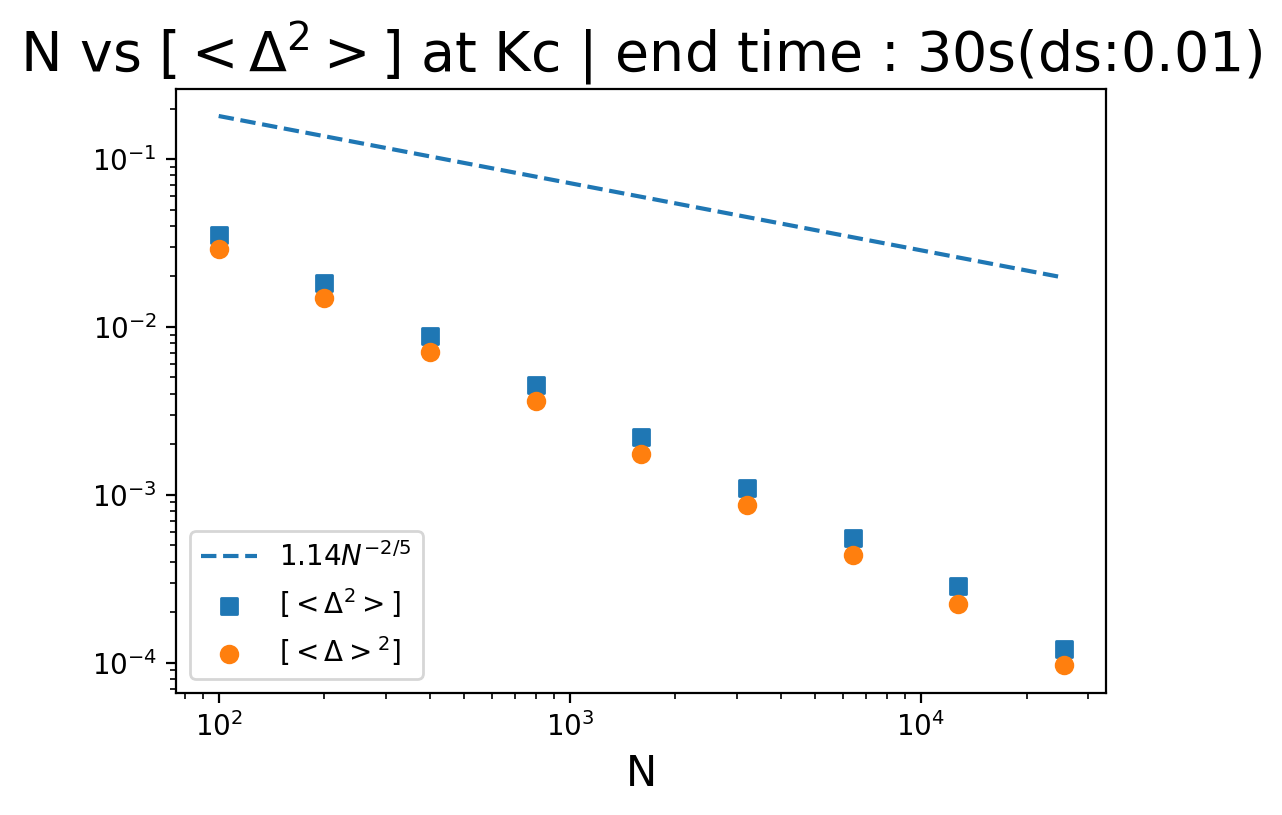

array([-1.01357468,  1.35764297])

In [ ]:
def temp_f(N):
    return 1.14*(N**(-2/5))

tempN=[];tempR2=[];tempR_avg2=[]
plt.figure(facecolor='white',dpi=200)
for name in data[:]:
    # plt.plot(ks,U(np.mean(rs2[name],axis=1),np.mean(rs4[name],axis=1)))
    tempN.append(int(name))
    tempR2.append(rs2_last[name][10])
    tempR_avg2.append(rs2_avg_last[name][10])
    
plt.scatter(tempN,tempR2,marker='s',label='$[<\Delta^2>]$')#,label=f"N={name}")
plt.scatter(tempN,tempR_avg2,label='$[<\Delta>^2]$')#,label=f"N={name}")
plt.plot(tempN,list(map(temp_f,tempN)),'--',label='$1.14N^{-2/5}$')
plt.xlabel('N')

plt.xscale('log')
plt.yscale('log')
# poly_exp(tempN,tempR2)
plt.legend()
plt.title('N vs $[<\Delta^2>]$ at Kc | end time : 30s(ds:0.01)')

plt.show()
# np.polyfit(tempy,np.log(tempx),1)

# sns.regplot(np.log(tempy),np.log(tempx))
np.polyfit(np.log(tempN),np.log(tempR2),1)


###  $[<\Delta^2>] N^{2/5}$ and $[<\Delta>^2] N^{2/5}$  versus $N^{-1/5}$

### K vs r by node size

In [58]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc,rcParams
#font_path = 'cambria.ttc'
font_path = "MARUBURI-REGULAR.OTF"
font = font_manager.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font
plt.rcParams['font.size'] = 20
plt.rcParams['axes.unicode_minus'] = False


In [54]:
def tempK_R(K):
    
    if K<1: return 0*K
    else:
        return np.sqrt(1-1/K)

In [ ]:
def K_R_theorical(K,Kc):
    R = lambda k: np.sqrt(1-Kc/k)
    r = [R(x) if x>Kc else 0 for x in K]
    return r

In [6]:
intdata = list(map(int,data))
int_ =np.linspace(0.5,1,len(intdata))
color = plt.cm.YlOrRd(int_)

In [ ]:
plt.figure(facecolor='white',dpi=200)
int_ =np.linspace(0.6,1,len(intdata))
color = plt.cm.YlOrRd(int_)
for i,name in enumerate(data):
    plt.figure()
    plt.plot(ks,np.mean(rs[name],axis=1),label=f'N={name}',marker='s',color = color[i])
# x=np.linspace(0.5,1.5,10000)
# plt.plot(x,K_R_theorical(x,1),'r-',label='theoretical')
    plt.legend(loc=2)
    plt.ylim(-0.01,0.95)
    plt.xlabel('K : coupling constant',fontsize=15)
    plt.ylabel('r : order parameter',fontsize=15)
    plt.title(f'K vs r graph N={name}',fontsize=20)
    plt.grid()
    # plt.savefig(f'./DATA_FILE/Kvsr/K vs r N={name}.png',transparent=True,dpi=800)
# plt.grid()
# plt.vlines(KUR.Kc,0,0.5,ls='--')
# plt.savefig('./DATA_FILE/K vs r Theoretical.png')

In [ ]:
len(data)

8

In [144]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

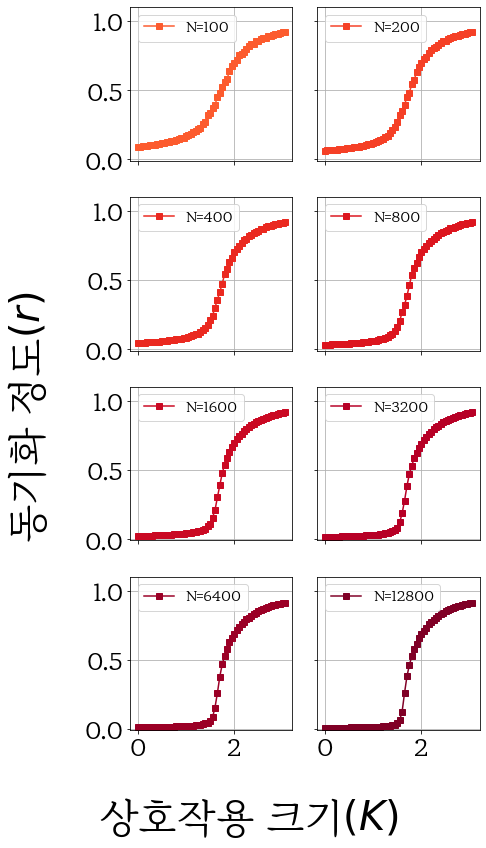

In [61]:
fig = plt.figure(figsize=(7,12))
int_ =np.linspace(0.6,1,len(intdata))
color = plt.cm.YlOrRd(int_)

for i,name in enumerate(data):
    plt.subplot(4,2,i+1)
    plt.plot(ks,np.mean(rs[name],axis=1),label=f'N={name}',marker='s',color = color[i])
# x=np.linspace(0.5,1.5,10000)
# plt.plot(x,K_R_theorical(x,1),'r-',label='theoretical')
    plt.legend(loc=2,fontsize=15)
    plt.ylim(-0.01,1.10)
    plt.xticks(fontsize =25)
    plt.yticks(fontsize =25)
    if i%2==1:
        ax =plt.gca()
        ax.axes.yaxis.set_ticklabels([])

        # now.axis.ylabel('')
        # now.axes.yaxis.set_visible(False)
    if i in [6,7]: pass
        # plt.xlabel('K : coupling constant',fontsize=10)
    else:
        ax =plt.gca()
        ax.axes.xaxis.set_ticklabels([])
    # plt.title(f'K vs r graph N={name}')
    plt.grid()
# ax = fig.add_subplot(111)

fig.supxlabel(r'상호작용 크기$(K)$',fontsize=40)
fig.supylabel(r'동기화 정도$(r)$',fontsize=40)
plt.tight_layout()
    # plt.savefig(f'./DATA_FILE/Kvsr/K vs r N={name}.png',transparent=True,dpi=800)
# plt.grid()
# plt.vlines(KUR.Kc,0,0.5,ls='--')
plt.savefig('./DATA_FILE/K vs r 4vs2.jpg',dpi=1600,transparent=True)

In [ ]:
rs_last['100'].shape

NameError: name 'rs_last' is not defined

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
Kc

3.191538243211461

In [ ]:
def fit_function(K,a,b,c):
    return a*(K-KUR.Kc)**b+c

In [ ]:
popt, pcov = curve_fit(fit_function,ks[32:39],rs_last['12800'][32:39])

In [ ]:
popt

array([1.06735484, 0.50667344, 0.07656519])

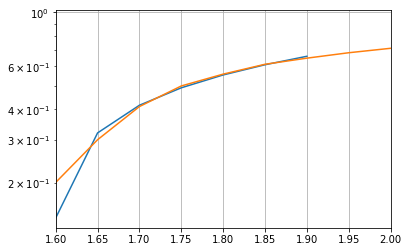

In [ ]:
plt.plot(ks[32:39],fit_function(ks[32:39],*popt),ks[32:],rs_last['3200'][32:])
plt.xlim(1.6,2)
plt.yscale('log')
plt.grid()

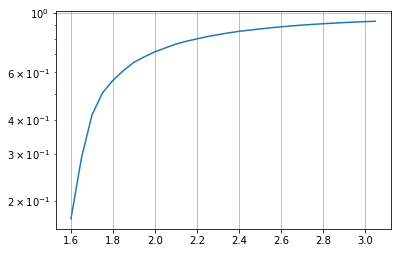

In [ ]:
# KUR.poly_exp(ks[32:39],rs_last['12800'][32:39],'r','K')
plt.plot(ks[32:],rs_last['6400'][32:])
# plt.legend()
plt.yscale('log')
plt.grid()
# plt.yscale('log')


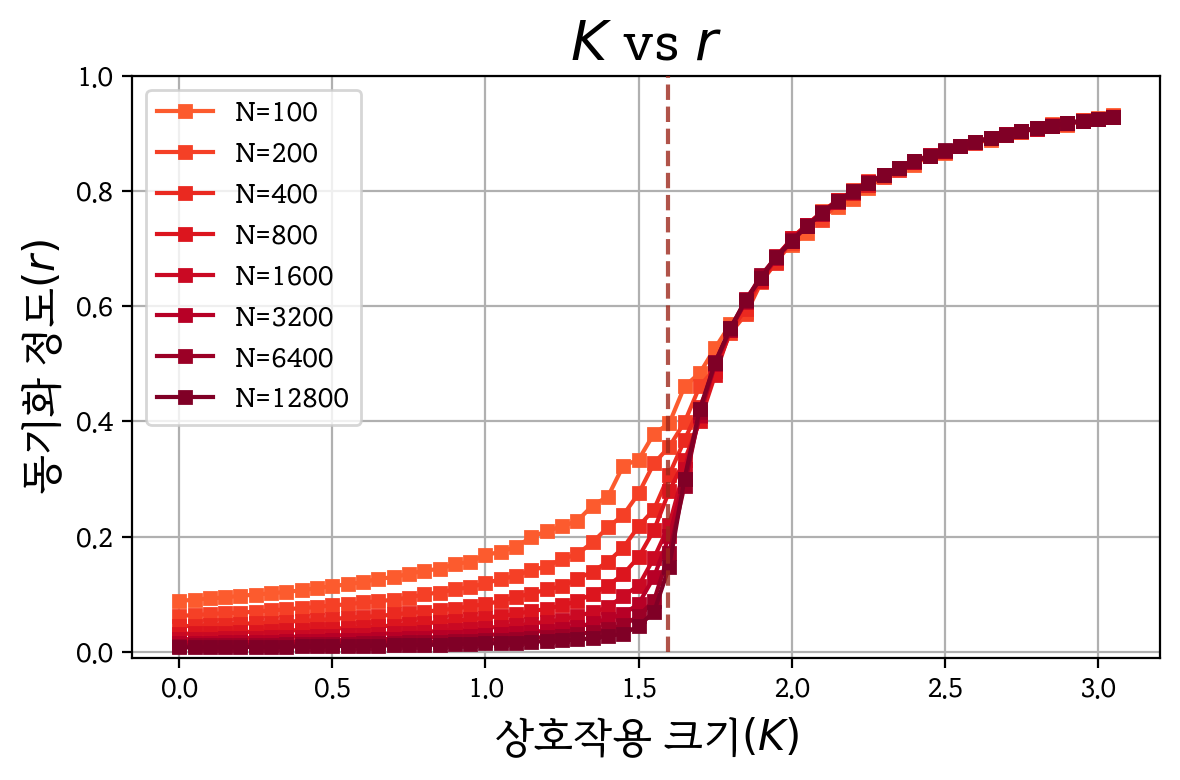

In [180]:
plt.figure(facecolor='white',dpi=200)
int_ =np.linspace(0.6,1,len(intdata))
color = plt.cm.YlOrRd(int_)
for i,name in enumerate(data[:]):
    # plt.figure()
    # plt.plot(ks,np.mean(rs[name],axis=1),label=f'N={name}',marker='s',color = color[i])
    # plt.plot(ks,np.mean(rs[name],axis=1),label=f'N={name}',marker='s',color = color[i])
    plt.plot(ks,rs_last[name],label=f'N={name}',marker='s',color = color[i],markersize= 4)
# plt.plot(K,list(map(K_R_theorical,K)),color='#B05264',ls='-',label='predicted graph')
# x=np.linspace(0.5,1.5,10000)
# plt.plot(x,K_R_theorical(x,1),'r-',label='theoretical')
plt.legend(loc=2)
plt.ylim(-0.01,1)
# plt.ylim(-0.01,0.9)
# fig.supxlabel(r'상호작용 크기$(K)$',fontsize=25)
# fig.supylabel(r'동기화 정도$(r)$',fontsize=25)
plt.xlabel(r'상호작용 크기$(K)$',fontsize=15)
plt.ylabel(r'동기화 정도$(r)$',fontsize=15)
# plt.title(f'K vs r graph',fontsize=20)
plt.title(r'$K$ vs $r$',fontsize=20)
plt.grid()
# plt.savefig(f'./DATA_FILE/Kvsr/K vs r Total.png',transparent=True,dpi=400)
# plt.grid()
plt.vlines(KUR.Kc,0,1,ls='--',zorder=3,alpha=0.8,colors='#9D281B')
plt.tight_layout()
# plt.savefig('./DATA_FILE/K vs r Theoretical.png')
# plt.savefig('./DATA_FILE/K vs r with line.png',transparent=True,dpi=800)
# plt.savefig('./DATA_FILE/K vs r with theorical.png',transparent=True,dpi=1600)
plt.savefig('./DATA_FILE/K vs r.jpg',transparent=True,dpi=1600)

In [ ]:
def poly_exp(tempN,tempR):
    a,b = np.polyfit(np.log(tempN),np.log(tempR),1)
    exp = lambda x : np.exp(b)*(x**(a))
    exp_list = list(map(exp,tempN))
    plt.plot(tempN,exp_list,'--',color='tab:orange',label=f'${b:.02f}e^{a:.02f}$')

In [ ]:
a,b = np.polyfit(np.log(tempN),np.log(tempR),1)
print(a,b)

TypeError: expected x and y to have same length

In [ ]:
import numpy as np
t = np.load('./FSS_NEW_CLASS/K_R/FINAL_NORM[0,3,0.1]/N=800,ensemble=100,ts.npy')
t.shape

FileNotFoundError: [Errno 2] No such file or directory: './FSS_NEW_CLASS/K_R/FINAL_NORM[0,3,0.1]/N=800,ensemble=100,ts.npy'

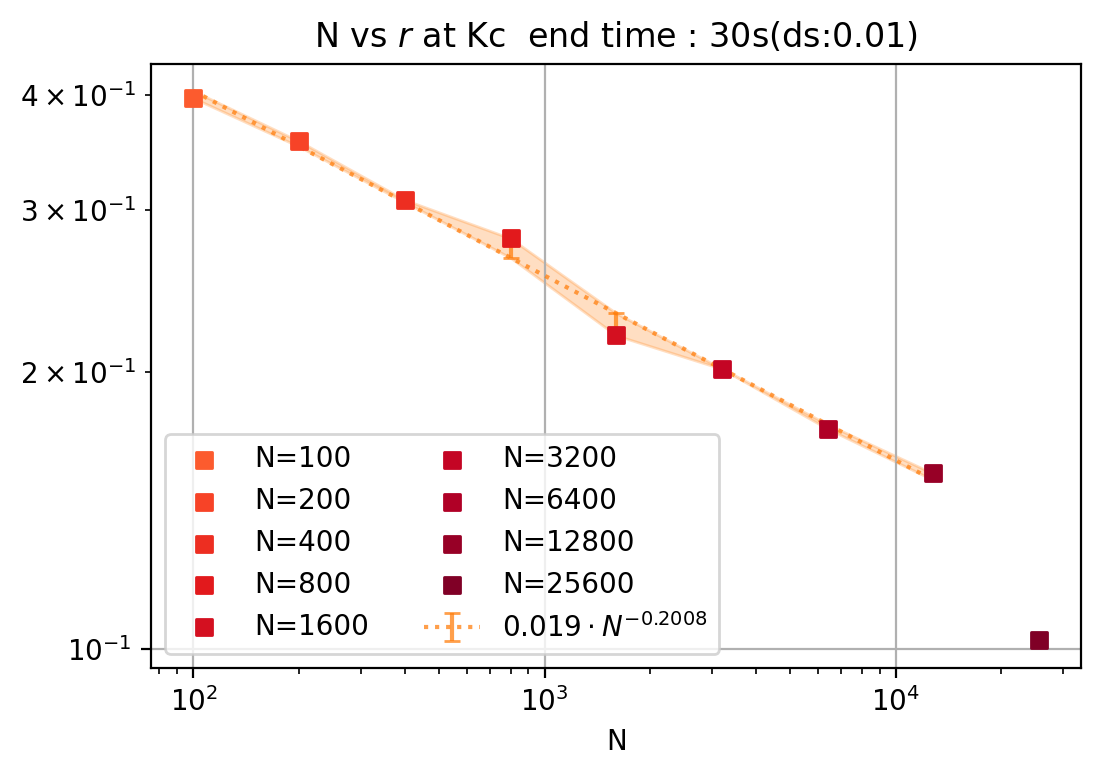

In [ ]:
tempN=[];tempR=[]
plt.figure(dpi=200)#,facecolor='white')

for i,name in enumerate(data[:]):
    # plt.plot(ks,U(np.mean(rs2[name],axis=1),np.mean(rs4[name],axis=1)))
    tempN.append(int(name))
    tempR.append(rs_last[name][16])
    plt.scatter(int(name),rs_last[name][16],marker='s',label=f'N={name}',color=color[i],zorder=3)
    # tempR_avg2.append(rs2_avg_last[name][10])
    
# plt.scatter(tempN,tempR,marker='s',label='$[<\Delta>]$')#,label=f"N={name}")
# plt.scatter(tempN,tempR_avg2,label='$[<\Delta>^2]$')#,label=f"N={name}")
# plt.plot(tempN,list(map(temp_f,tempN)),'--',label='$1.14N^{-2/5}$')

plt.xlabel('N')
# plt.ylabel(r' $[\left \langle \Delta \right \rangle]$')
# plt.ylabel(r' $r$')


# plt.plot(tempN,poly_exp(tempN,tempR)(tempN))
# poly_exp(tempN,tempR)

plt.legend()
plt.xscale('log')
plt.yscale('log')
# plt.title(r'N vs $[\left \langle \Delta \right \rangle]$ at Kc  end time : 30s(ds:0.01)')
plt.title(r'N vs $r$ at Kc  end time : 30s(ds:0.01)')
# para = ('r','N')
KUR.poly_exp(tempN[:8],tempR[:8],'r','N')
# plt.savefig('./DATA_FILE/N vs r(Kc).png')
# plt.tight_layout()
plt.legend(ncol=2)
plt.grid()
# plt.show()

a = np.polyfit(np.log(tempN),np.log(tempR),1)

# plt.savefig('./DATA_FILE/Kc vs r.png',transparent=True,dpi=800)


In [77]:
def read_data(adress,Ns):
    ''' 
    RETURN all value of evalueate data from adress
    t, N, N_dic, chis, r_tmeans, r_t_each, r_ts
    N_dic : 딕셔너리 형태로 만든 order parameter data
    chis  : dynamic fluctuation을 확인하기 위해서 만든 데이터
    r_tmeans : time avarage and then, ensemble avarage
    r_t_each : 히스토그램을 확인하기 위한 데이터
    r_ts : 앙상블 평균해준 데이터, 시간에 대한 변화를 확인하기 위해서
    '''
    TEST_folder = adress
    N_dic = {}
    for N in Ns:
        N_arr = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N={N},ar_Kc,rs_raw.npy')
        # N_arr = N_arr[np.random.randint(N_arr.shape[0], size=100),:]
        N_dic[str(N)] = N_arr
    t = np.load(f'FSS_NEW_CLASS/{TEST_folder}/NORM/N={N},ar_Kc,ts.npy')[0]
    N,r_arr = zip(*N_dic.items())
    Ns = list(map(int,N))
    # cut = lambda x: x[:,5000:15000]
    # cut = lambda x: x[:,-150000:-100000]    
    # cut = lambda x: x[:,10000:20000]    
    cut = lambda x: x[:,15000:25001]    
    cut2 = lambda x: x[:,15000:25001]**2
    
    mean = lambda x: np.mean(x)
    e_mean = lambda x: np.mean(x,axis=0)
    t_mean = lambda x: np.mean(x,axis=1)
    cut_r = list((map(cut,r_arr)))
    cut_r2 = list((map(cut2,r_arr)))

    chi = lambda x,N : N*np.mean(np.mean(x**2,axis=1) -np.mean(x,axis=1)**2)
    r_tmeans = list(map(mean,list(map(t_mean,cut_r))))
    r2_tmeans = list(map(mean,list(map(t_mean,cut_r2))))
    r_t_each = list(map(t_mean,cut_r))

    r_ts = list(map(e_mean, r_arr))
    chis = [chi(cut_r[i],N_) for i,N_ in enumerate(Ns)]
    
    return t,N, N_dic, chis, r_tmeans,r2_tmeans, r_t_each, r_ts,
Ns=[100,200,400,800,1600,3200,6400,12800]
t,N, N_dic, chis, r_tmeans,r2_tmeans, r_t_each, r_ts = read_data('AT_KC',Ns)
# t,N, N_dic2, chis2, r_tmeans2, r_t_each2, r_ts2 = read_data('FINAL',Ns)

In [8]:
for i in  N_dic.items():print(i[1].shape)

(200, 50001)
(200, 50001)
(200, 50001)
(200, 50001)
(50, 25001)


In [ ]:
N =('100','200','400','800','1600','3200','6400','12800')

In [80]:
N[4:]

('1600', '3200', '6400', '12800')

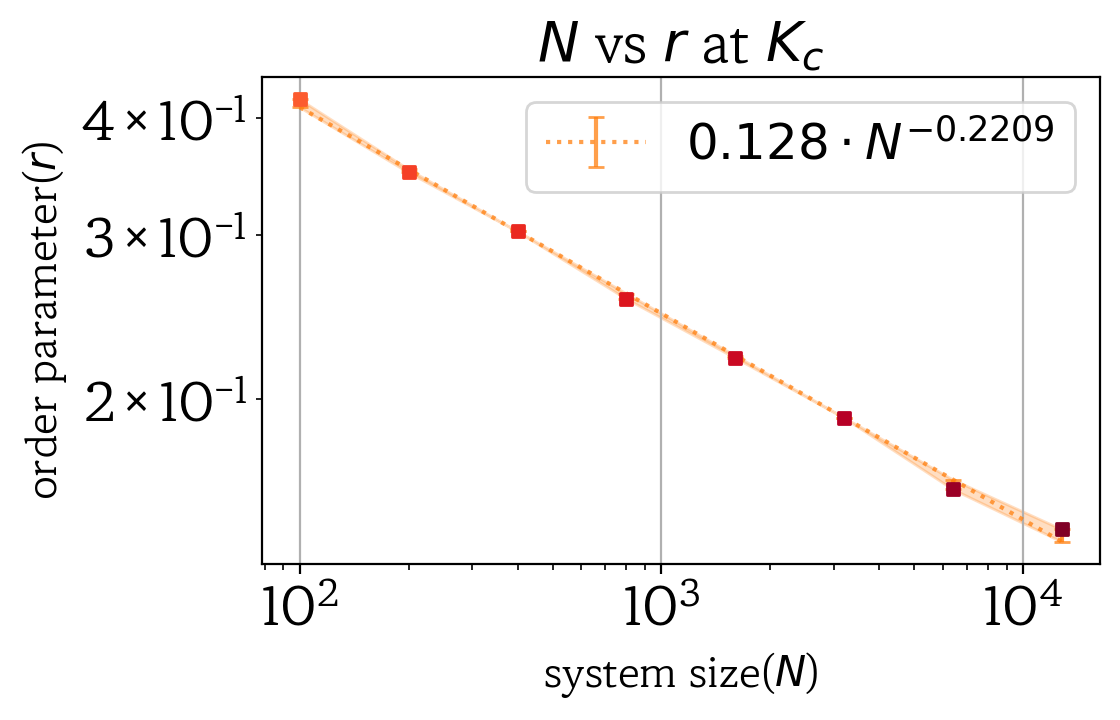

In [93]:
tempN=[];tempR=[]
plt.figure(dpi=200)
for i,name in enumerate(N[:]):
    N_ = int(name)
    R_ = r_tmeans[i]
    tempN.append(N_)
    tempR.append(R_)
    plt.scatter(N_,R_,marker='s',color=color[i],zorder=3,s=20)#,label=f'N={name}',color=color[i],zorder=3)
plt.xlabel(r'system size($N$)',fontsize= 15)
plt.ylabel(r'order parameter($r$)',fontsize= 15)
plt.xscale('log')
plt.yscale('log')
plt.title(r'$N$ vs $r$ at $K_{c}$',fontsize=20)
# plt.xticks(fontsize=5)
# plt.yticks(fontsize=10)
# KUR.poly_exp(tempN[4:8],tempR[4:8],'r','N')
KUR.poly_exp(tempN[:],tempR[:],'r','N')

# KUR.poly_exp(tempN[0:8],tempR[0:8],'r','N')
# plt.legend(fontsize=160)
plt.legend(ncol=2,fontsize=18)
plt.grid()
plt.tight_layout()
plt.savefig('slack용/N vs r at (100-12800).png',dpi=400)

In [98]:
1/((0.2085)*2)

2.3980815347721824

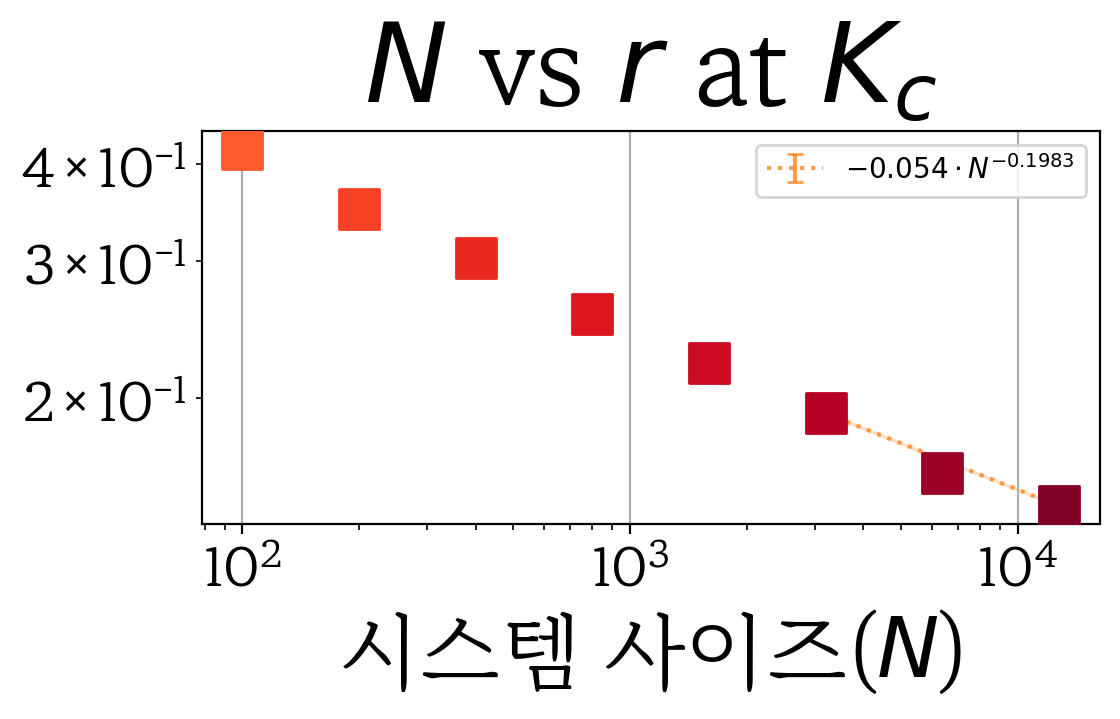

In [100]:
tempN=[];tempR=[]
plt.figure(dpi=200)
for i,name in enumerate(N):
    N_ = int(name)
    R_ = r_tmeans[i]
    tempN.append(N_)
    tempR.append(R_)
    plt.scatter(N_,R_,marker='s',color=color[i],zorder=3,s=200)#,label=f'N={name}',color=color[i],zorder=3)
plt.xlabel(r'시스템 사이즈($N$)',fontsize= 30)
plt.xscale('log')
plt.yscale('log')
plt.title(r'$N$ vs $r$ at $K_{c}$',fontsize=40)
plt.xticks(fontsize=20)
KUR.poly_exp([tempN[5],tempN[7]],[tempR[5],tempR[7]],'r','N')
# KUR.poly_exp(tempN[0:8],tempR[0:8],'r','N')
# plt.legend(fontsize=160)
plt.legend(ncol=2,fontsize=10)
plt.yticks(fontsize=20)
plt.grid()
plt.tight_layout()
# plt.savefig('./DATA_FILE/N vs r(Kc).jpg',dpi=800,transparent=True)

# plt.savefig('./DATA_FILE/N vs r(Kc).png',dpi=800,transparent=True)
# plt.savefig('./DATA_FILE/N vs r(Kc)_small.png',dpi=800)#,transparent=True)


In [92]:
1/(0.2242*2)

2.230151650312221

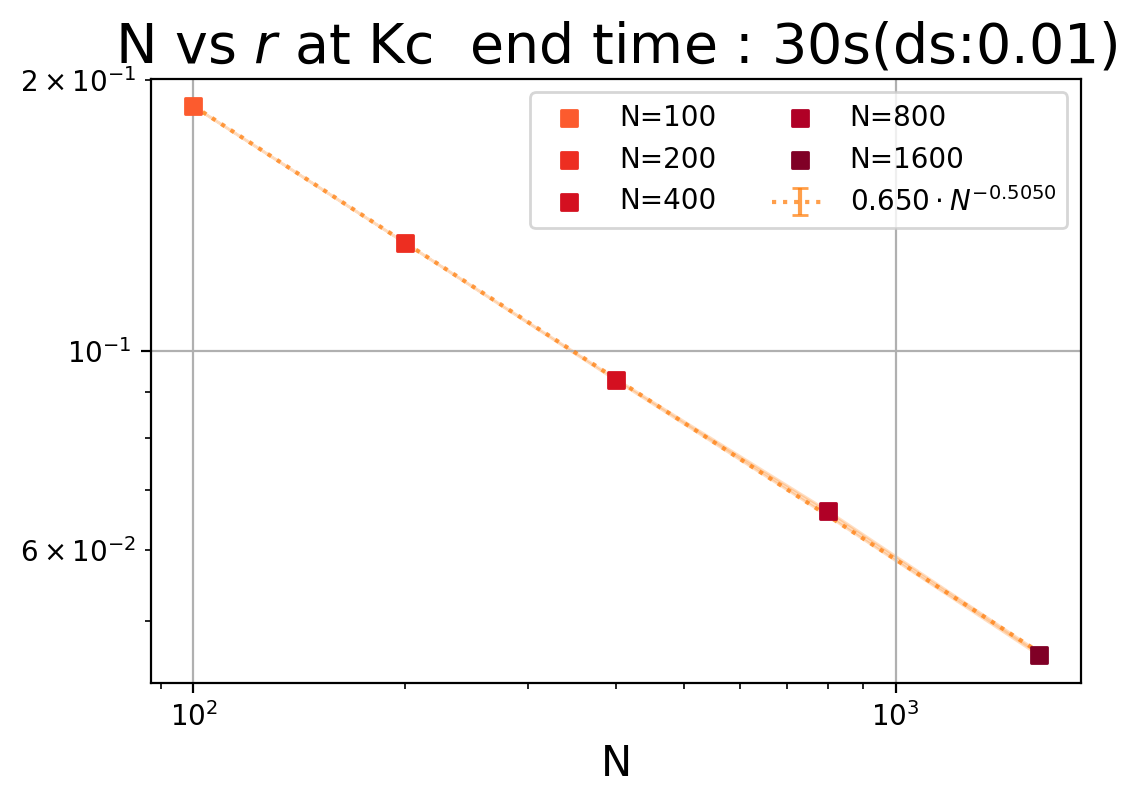

In [ ]:
tempN=[];tempR=[]
plt.figure(dpi=200)#,facecolor='white')

for i,name in enumerate(data[:]):
    # plt.plot(ks,U(np.mean(rs2[name],axis=1),np.mean(rs4[name],axis=1)))
    tempN.append(int(name))
    tempR.append(rs_last[name][10])
    plt.scatter(int(name),rs_last[name][10],marker='s',label=f'N={name}',color=color[i],zorder=3)
    # tempR_avg2.append(rs2_avg_last[name][10])
    
# plt.scatter(tempN,tempR,marker='s',label='$[<\Delta>]$')#,label=f"N={name}")
# plt.scatter(tempN,tempR_avg2,label='$[<\Delta>^2]$')#,label=f"N={name}")
# plt.plot(tempN,list(map(temp_f,tempN)),'--',label='$1.14N^{-2/5}$')

plt.xlabel('N')
# plt.ylabel(r' $[\left \langle \Delta \right \rangle]$')
# plt.ylabel(r' $r$')


# plt.plot(tempN,poly_exp(tempN,tempR)(tempN))
# poly_exp(tempN,tempR)

plt.legend()
plt.xscale('log')
plt.yscale('log')
# plt.title(r'N vs $[\left \langle \Delta \right \rangle]$ at Kc  end time : 30s(ds:0.01)')
plt.title(r'N vs $r$ at Kc  end time : 30s(ds:0.01)')
# para = ('r','N')
KUR.poly_exp(tempN[:8],tempR[:8],'r','N')
# plt.savefig('./DATA_FILE/N vs r(Kc).png')
# plt.tight_layout()
plt.legend(ncol=2)
plt.grid()
plt.tight_layout()
# plt.show()

a = np.polyfit(np.log(tempN),np.log(tempR),1)


C:\users\kim9y\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

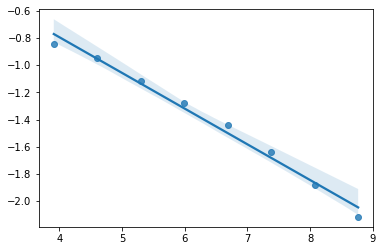

In [ ]:
sns.regplot(np.log(tempN),np.log(tempR))

### FSS scailing function
$\Delta =N^{-\beta/\bar{\nu}}f(\epsilon N^{1/\bar{\nu}})$   
$\epsilon = K -K_c$  
$\beta = \frac{1}{2} \text{ and } \bar{\nu} = \frac{5}{2}$  
$\Delta = [<\Delta>]$

In [22]:
def FSS(beta,nu,N,rs_last,Ks):
    Kc=KUR.Kc
    xs,ys=[],[]
    for i,K in enumerate(Ks):
        if K != Kc:
            x=(K-Kc)*N**(1/nu)
            y=N**(beta/nu)*rs_last[str(N)][i]
            xs.append(x)
            ys.append(y)
    return (xs,ys)

In [ ]:
1/(0.2199*2)

2.2737608003638017

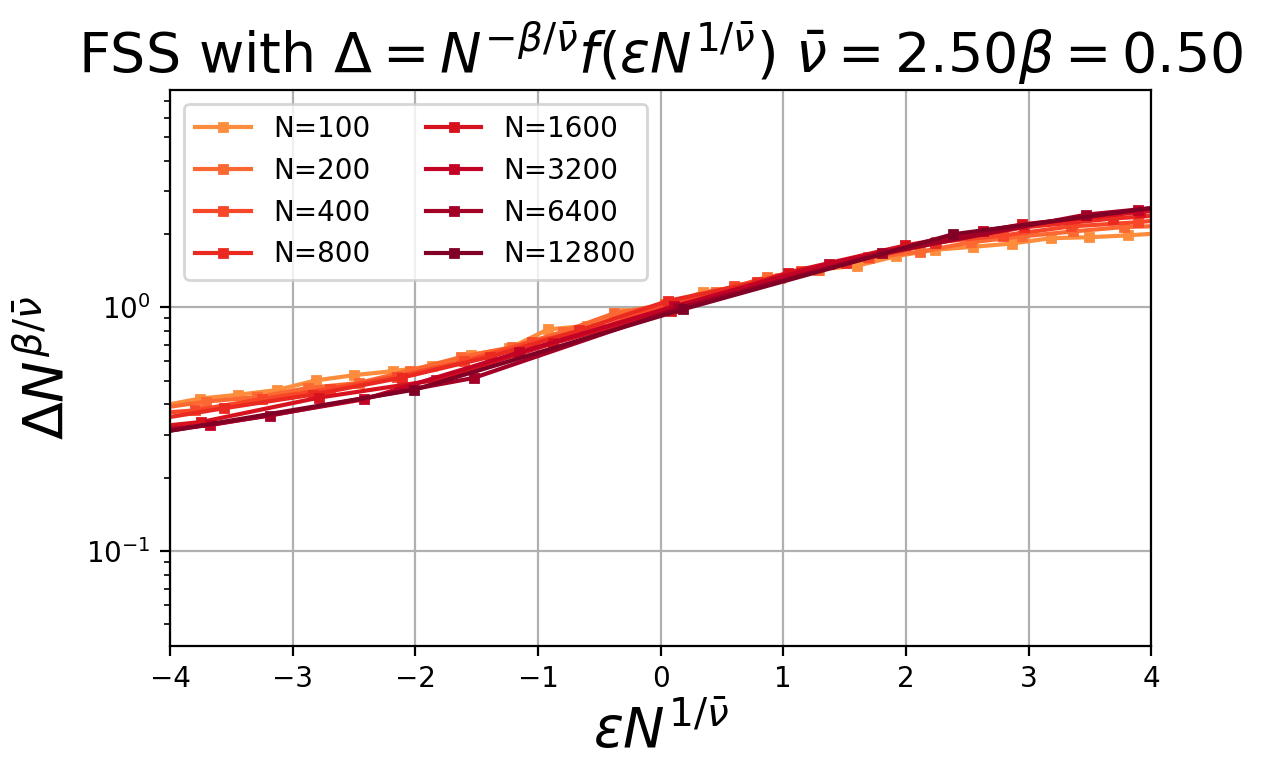

In [29]:
plt.figure(facecolor='white',dpi=200)
for i,name in enumerate(data):
    N=int(name)
    nu = 2.5
    beta = 0.5
    xs,ys=FSS(beta,nu,N,rs_last,ks)
    plt.plot(xs,ys,label=f'N={name}',c=color[i], marker ='s',markersize= 3)

plt.yscale('log')
plt.xlim(-4,4)
plt.legend(ncol=2)
plt.title(r'FSS with $\Delta =N^{-\beta/\bar{\nu}}f(\epsilon N^{1/\bar{\nu}})$ $\bar{\nu} = %.02f \beta = %.02f$'%(nu,beta),fontsize= 20)
plt.xlabel(r'$\epsilon N^{1/\bar{\nu}}$',fontsize= 20)
plt.ylabel(r'$\Delta N^{\beta/\bar{\nu}}$',fontsize= 20)
plt.grid()
plt.tight_layout()
# plt.savefig('./DATA_FILE/FSS_-4to4_nubar 2.5.png',dpi=800, transparent=True)
# plt.savefig('./DATA_FILE/FSS nubar 2.5.png',dpi=800, transparent=True)

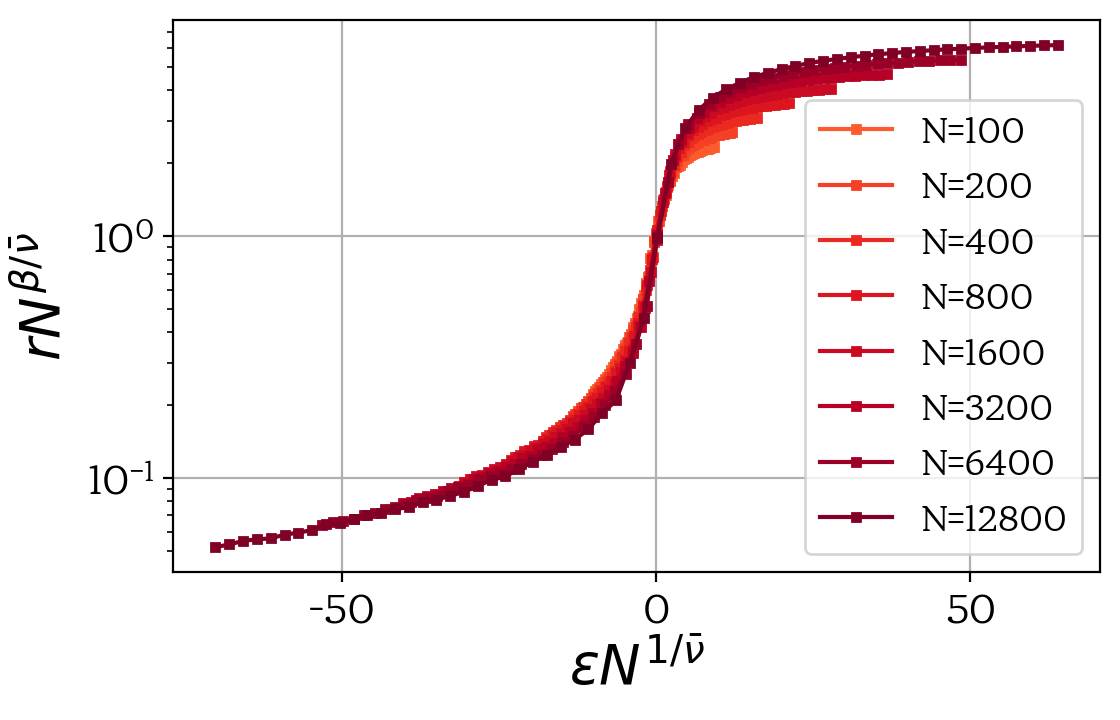

In [111]:
plt.figure(facecolor='white',dpi=200)
for i,name in enumerate(data[:]):
    N=int(name)
    nu = 2.5
    beta = 0.5
    xs,ys=FSS(beta,nu,N,rs_last,ks)
    plt.plot(xs,ys,label=f'N={name}',c=color[i], marker ='s',markersize= 3)

plt.yscale('log')
# plt.xlim(-4,4)
plt.legend(ncol=1,fontsize=13)
# plt.legend(fontsize=13)
ax = plt.gca()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r'FSS with $r =N^{-\beta/\bar{\nu}}f(\epsilon N^{1/\bar{\nu}})$ $\bar{\nu} = %.02f \beta = %.02f$'%(nu,beta))
plt.xlabel(r'$\epsilon N^{1/\bar{\nu}}$',fontsize= 20)
plt.ylabel(r'$r N^{\beta/\bar{\nu}}$',fontsize= 20)
plt.grid()
plt.tight_layout()
# plt.savefig('./DATA_FILE/FSS_-4to4_nubar 2.5.jpg',dpi=800 )
# plt.savefig('./DATA_FILE/FSS nubar 2.5.jpg',dpi=800)#, transparent=True)

# plt.savefig('./DATA_FILE/FSS_-4to4_nubar 2.5.png',dpi=800, transparent=True)
plt.savefig('./DATA_FILE/FSS nubar 2.5.png',dpi=800, transparent=True)

K도 name통해서 읽어오면 문제가 줄어들듯?

In [ ]:
K= 2
(K-KUR.Kc)*(100**(1/2.5))

2.550524415885442

In [ ]:
(K-KUR.Kc) = -4/(N**(1/2.5))


In [ ]:
plt.plot(ks,U(np.array(rs2max),np.array(rs4max)))
# plt.plot(ks,U(np.array(rs2),np.array(rs4)))

NameError: name 'rs2max' is not defined

In [ ]:
np.array(rs2max)

array([0.04617392, 0.04405014, 0.05091778, 0.0467372 , 0.05828502,
       0.08264244, 0.09247137, 0.10441845, 0.17964953, 0.21791802,
       0.24729938, 0.29453682, 0.43531345, 0.47529678, 0.55284539,
       0.55398102, 0.6335944 , 0.57178955, 0.73800872, 0.73519058,
       0.71360477, 0.74969484, 0.79840792, 0.77809386, 0.82571821,
       0.79909553, 0.83337292, 0.85953321, 0.84556874, 0.87375912,
       0.88213373])

## 기존의 만들었던 데이터 다시 받아야 할지도 모르겠다. 22/04/02
> binder cumalation할떄 얻는 데이터가 r 의 앙상블 평균이 아니라 제곱과 4제곱의 평균이어야 한다.

### 22/04/02 TEST 1~3 기존에 있었던 데이터를 확인하고, 문제있는 가 확인하는것 시간은 길게 가져가고, 앙상블을 조금 높이는 방법을 하는것
> TEST 4는 U1으로 해준 데이터를 얻었을때 밑으로 파인부분이 있는 것이, Kc이며, U2에서 했을때 그근처가 Kc일 가능성이 높다.  
> 0.8-1.2 0.02의 간격으로 다시 얻어보자

## Ks 0.05 step, N=50,100,200,400,800,1600,3200,6400, ensemble=100

In [ ]:
import numpy as np, matplotlib.pyplot as plt

In [ ]:
Ns =[1600]
for N in Ns:
    r_05_1 = np.load(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0.05,3.05,0.1]/N={N},ensemble=200,raw_rs.npy')
    r_05_2 = np.load(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0.05,3.05,0.1]/N={N},ensemble=100,raw_rs.npy')
    print(r_05_1.shape,  r_05_2.shape)
    
    if  r_05_1.shape  ==  r_05_2.shape:
        rs  =  np.concatenate([r_05_1,r_05_2],axis=1)
        np.save(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0.05,3.05,0.1]/N={N},ensemble=200,raw_rs',rs)
    else:  print(r_05_1.shape,  r_05_2.shape)
    

(31, 200, 25001) (31, 100, 25001)
(31, 200, 25001) (31, 100, 25001)


In [ ]:
r_05_1.shape  ==  r_05_2.shape

True

In [ ]:
Ns =[1600]
save = True
# save = True
ensemble =  200
for N in Ns: 
    r_total = []
    K_total = []
    r_0 = np.load(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0,3,0.1]/N={N},ensemble={ensemble},raw_rs.npy')
    K_0 = np.load(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0,3,0.1]/N={N},ensemble={ensemble},Ks.npy')
    r_05 = np.load(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0.05,3.05,0.1]/N={N},ensemble={ensemble},raw_rs.npy')
    K_05 = np.load(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0.05,3.05,0.1]/N={N},ensemble={ensemble},Ks.npy')
    t = np.load(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0.05,3.05,0.1]/N={N},ensemble={ensemble},ts.npy')
    for i in range(31):
        # print(i,r_0[i].shape,r_05[i].shape)
        r_total.append(r_0[i])
        K_total.append(K_0[i])
        r_total.append(r_05[i])
        K_total.append(K_05[i])
    r_total = np.array(r_total)
    K_total = np.array(K_total)
    r_total_mean = np.mean(r_total, axis=1)
    
    if save == True:
        np.save(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0,3.05,0.05]/N={N},ensemble={ensemble},raw_rs',r_total)
        np.save(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0,3.05,0.05]/N={N},ensemble={ensemble},rs',r_total_mean)
        np.save(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0,3.05,0.05]/N={N},ensemble={ensemble},Ks',K_total)
        np.save(f'./FSS_NEW_CLASS/K_R/FINAL_NORM[0,3.05,0.05]/N={N},ensemble={ensemble},ts',t)
    

In [ ]:
r_total = np.array(r_total)
K_total = np.array(K_total)
r_total_mean = np.mean(r_total, axis=1)

In [ ]:
r_0.shape

(31, 200, 25001)

In [ ]:
r_total_mean.shape

(62, 25001)

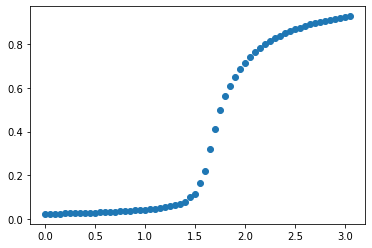

In [ ]:
plt.scatter(K_total,np.mean(r_total_mean[:,-10000:],axis=1))